# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Basthian Arisna
- **Email:** bastianarisna@gmail.com
- **ID Dicoding:** basthian_arisna_qg5x

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan?
- Apa pola pembelian yang paling umum dari pelanggan di berbagai lokasi geografis?
- Bagaimana korelasi antara lokasi geografis pelanggan dengan jenis produk yang mereka beli?
- Bagaimana persebaran ulasan produk berdasarkan kategori produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data Wrangling

### Gathering Data

**Data Customer**

In [2]:
customers_df = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Data Geolokasi**

In [3]:
geolocation_df = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Data Order Items**

In [4]:
order_items_df = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Data Order Payments**

In [5]:
order_payments_df = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Data Order Reviews**

In [6]:
order_reviews_df = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Data Orders**

In [7]:
orders_df = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Data Product Category**

In [8]:
product_category_df = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Data Products**

In [9]:
products_df = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Data Sellers**

In [10]:
sellers_df = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Data Customer**

In [11]:
# Cek tipe data untuk setiap kolom
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Info:
- Terdapat 99441 data customer
- Tidak ada data null

In [12]:
# Cek missing value
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# Cek data duplikat
print(f'Jumlah data duplikat: {customers_df.duplicated().sum()}')
print(f'Jumlah data unik pada kolom customer_id: {len(customers_df.customer_id.unique())}')

Jumlah data duplikat: 0
Jumlah data unik pada kolom customer_id: 99441


Info:
- Tidak ada data duplikat

In [14]:
# Cek parameter statistik
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Data Geolokasi**

In [15]:
# Cek informasi data
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Info:
- Terdapat 1.000.163 data geolokasi
- Tidak terdapat missing value

In [16]:
# Cek missing value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
# Cek data duplikat
print(f'Jumlah data duplikat: {geolocation_df.duplicated().sum()}')

Jumlah data duplikat: 261831


Info:
- Terdapat 261.831 data duplikat

In [18]:
# Cek parameter statistik
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Data Order Item**

In [19]:
# Cek info data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Info:
- Terdapat 112.650 data
- Tipe data pada kolom **shipping_limit_date** perlu diubah ke tipe **date**
- Tidak ada missing value

In [20]:
# Cek missing value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
# Cek data duplikat
print(f'Jumlah data duplikat: {order_items_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info:
- Tidak ada data duplikat

In [22]:
# Cek parameter statistik
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Info:
- Terdapat kemungkinan adanya outlier pada kolom order_item_id, price, dan freight_value

**Data Order Payments**

In [23]:
# Cek info data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Info:
- Terdapat 102.886 data
- Tidak ada missing value

In [24]:
# Cek missing value
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
# Cek data duplikat
print(f'Jumlah data duplikat: {order_payments_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [26]:
# Cek parameter statistik
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Info: Terdapat kemungkinan adanya outlier

**Data Order Reviews**

In [27]:
# Cek info data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Info:
- Terdapat total 99.224 data
- Terdapat missing value pada kolom review_comment_title dan review_comment_message
- Tipe data kolom creation_date dan answer_timestamp perlu diubah

In [28]:
# Cek missing value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
# Cek data duplikat
print(f'Jumlah data duplikat: {order_reviews_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [30]:
# Cek parameter statistik
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Data Orders**

In [31]:
# Cek info data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Info:
- Terdapat total 99.441 data
- Terdapat missing value pada kolom dengan indeks 4, 5, 6
- TIpe data kolom indeks 3, 4, 5, 6, 7 perlu diubah ke date

In [32]:
# Cek missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
# Cek data duplikat
print(f'Jumlah data duplikat: {orders_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [34]:
# Cek parameter statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Data Kategori Produk**

In [35]:
# Cek info data
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Info:
- Terdapat 71 data
- Tidak ada missing value

In [36]:
# Cek missing value
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
# Cek data duplikat
print(f'Jumlah data duplikat: {product_category_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [38]:
# Cek parameter statistik
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Data Produk**

In [39]:
# Cek info data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Info:
- Terdapat max 32.951 data
- Terdapat missing value

In [40]:
# Cek missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
# Cek data duplikat
print(f'Jumlah data duplikat: {products_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [42]:
# Cek parameter statistik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Data Seller**

In [43]:
# Cek info data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Info: 
- Terdapat 3.095 data
- Tidak ada missing value

In [44]:
# Cek missing value
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
# Cek data duplikat
print(f'Jumlah data duplikat: {sellers_df.duplicated().sum()}')

Jumlah data duplikat: 0


Info: Tidak ada data duplikat

In [46]:
# Cek parameter statistik
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

**Data Geolokasi**

In [47]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [48]:
print(f'Before -> Jumlah data duplikat: {geolocation_df.duplicated().sum()}')

# Mengatasi data duplikat
geolocation_df.drop_duplicates(inplace=True)

print(f'After -> Jumlah data duplikat: {geolocation_df.duplicated().sum()}')

Before -> Jumlah data duplikat: 261831
After -> Jumlah data duplikat: 0


In [49]:
# Simpan data yang sudah bersih
geolocation_df.to_csv('Clean Data/geolocation_dt_cleaned.csv', index=False)

**Data Order Items**

In [50]:
# Ubah tipe data kolom shipping_limit_date ke date
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [51]:
# Cek tipe data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Ada kemungkinan outlier pada kolom order_item_id, price, dan freight_value

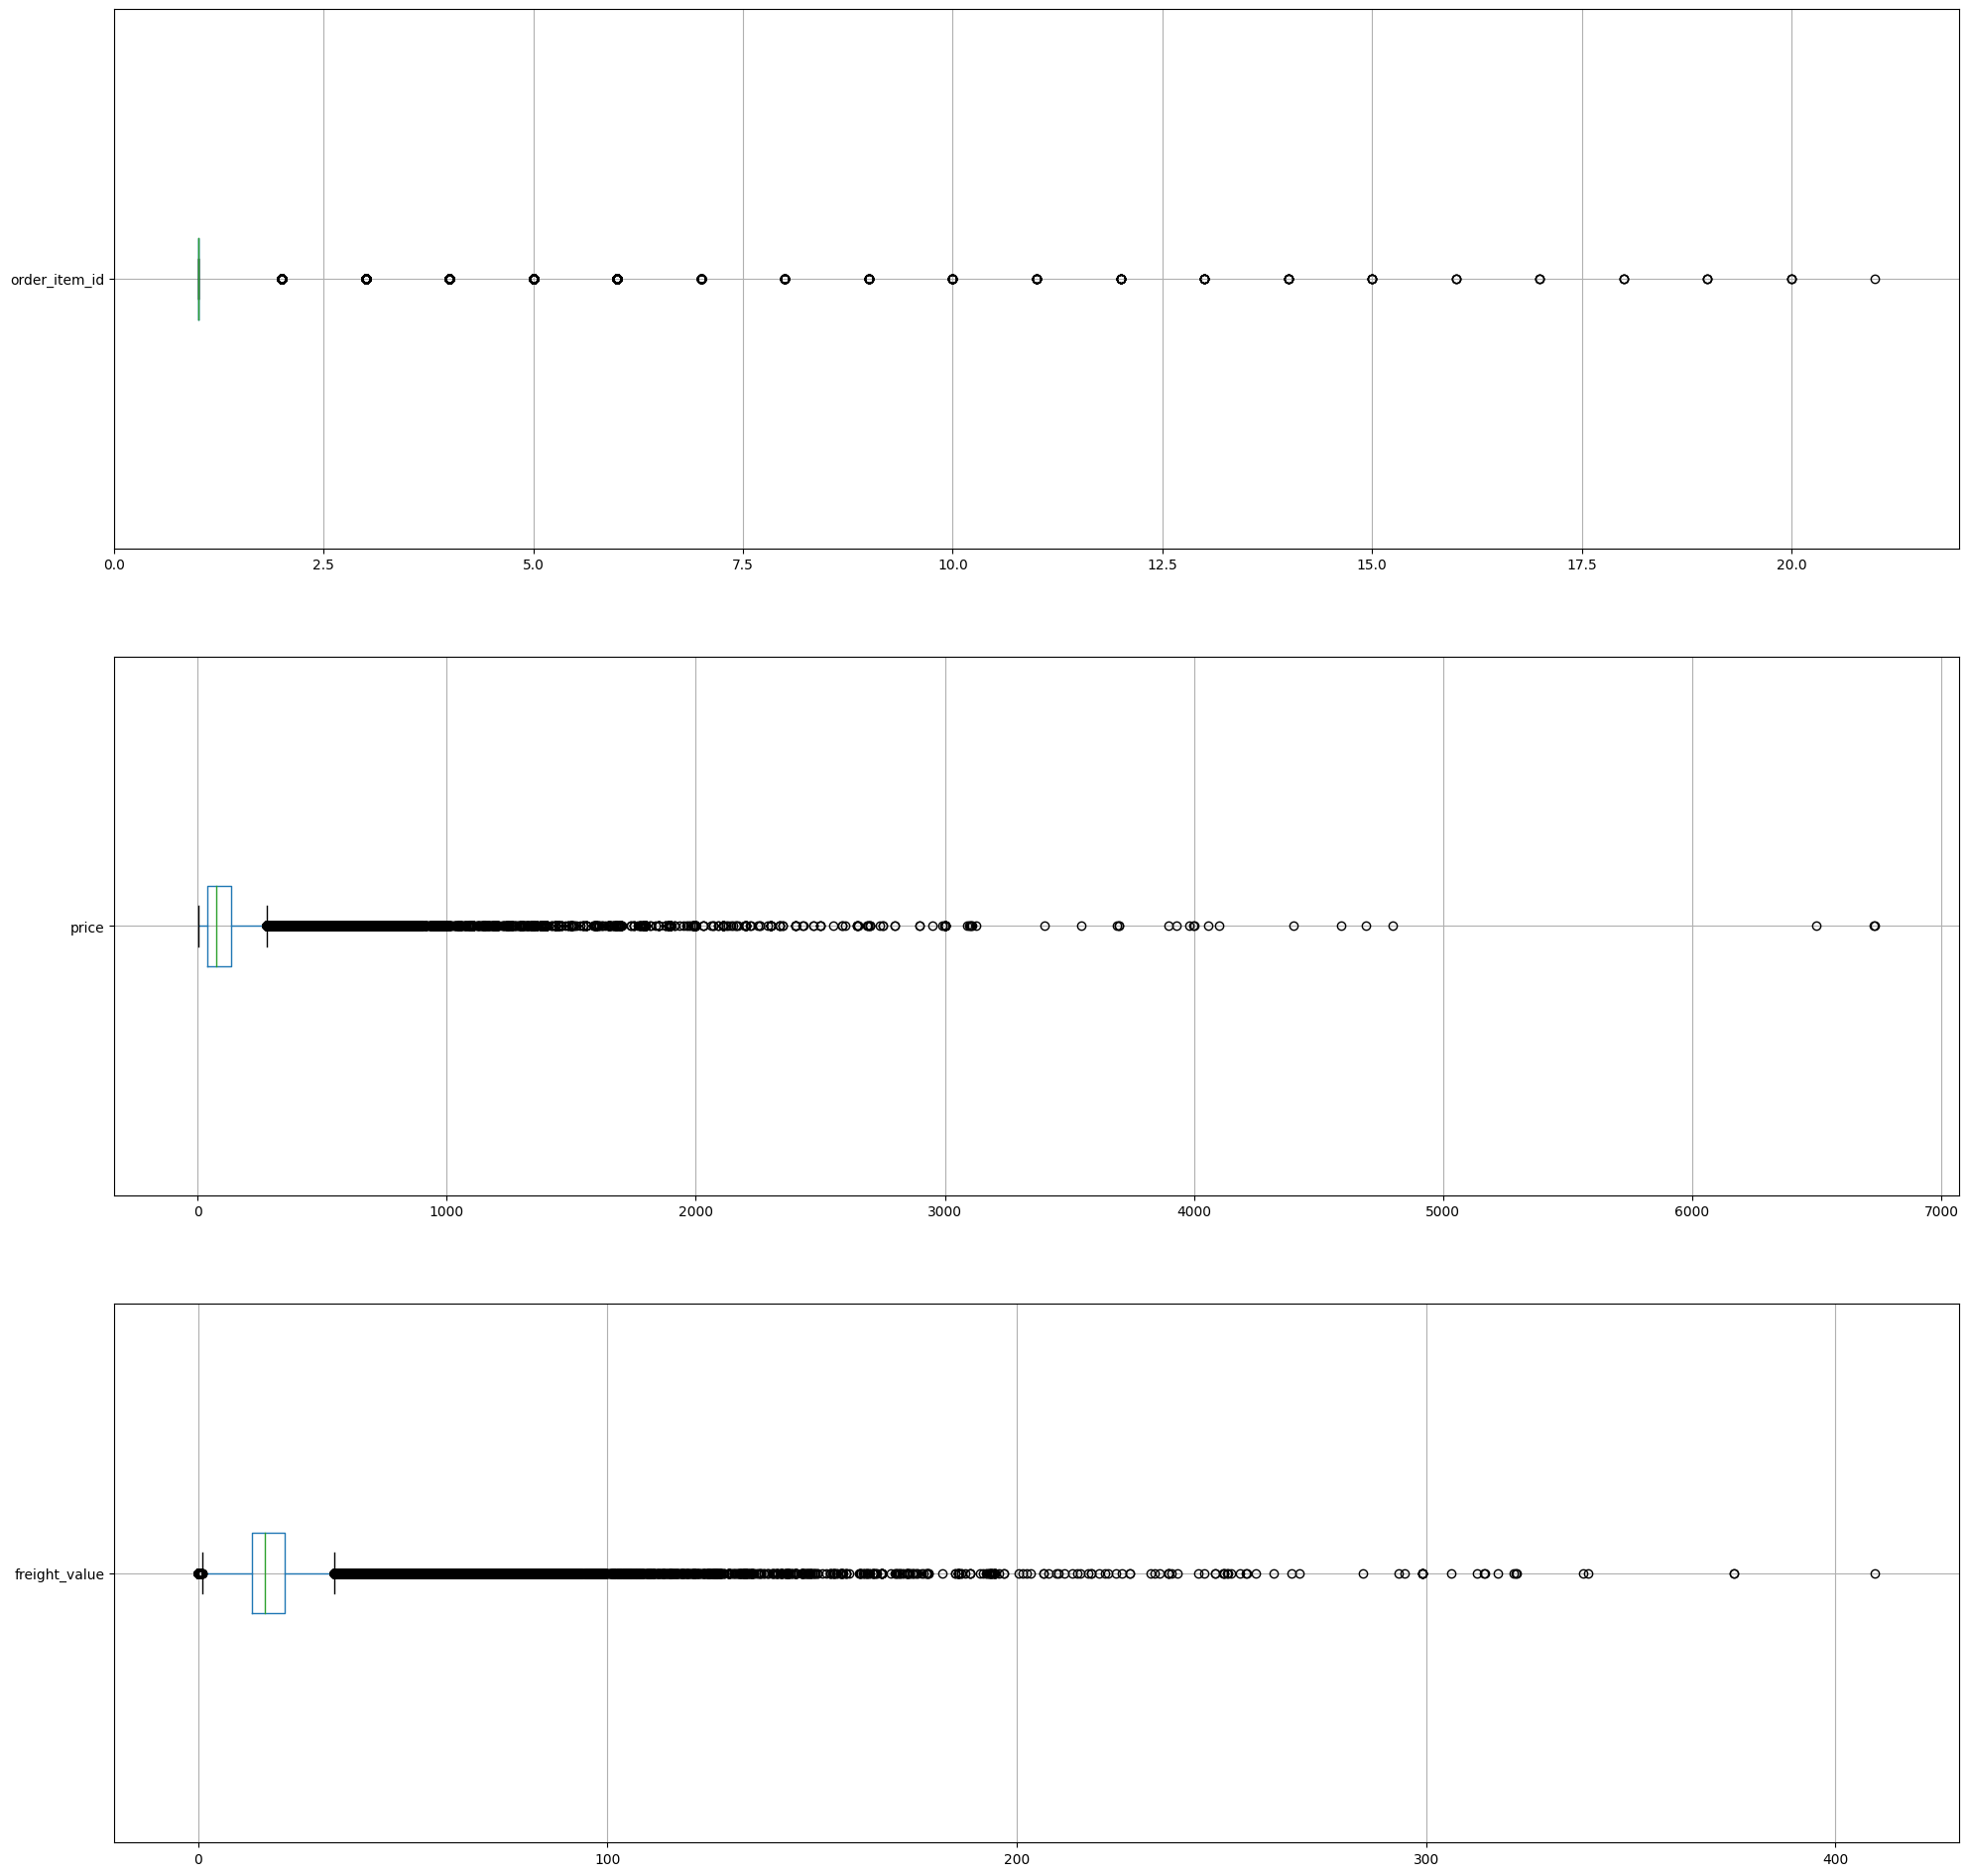

In [52]:
# Visualisasi outlier
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 24))
order_items_df.boxplot(column='order_item_id', ax=ax[0], vert=False)
order_items_df.boxplot(column='price', ax=ax[1], vert=False)
order_items_df.boxplot(column='freight_value', ax=ax[2], vert=False)

plt.show()

**Data Order Payments**

Ada kemungkinan outlier pada kolom payment_sequential, payment_installments, dan payment_value

In [53]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


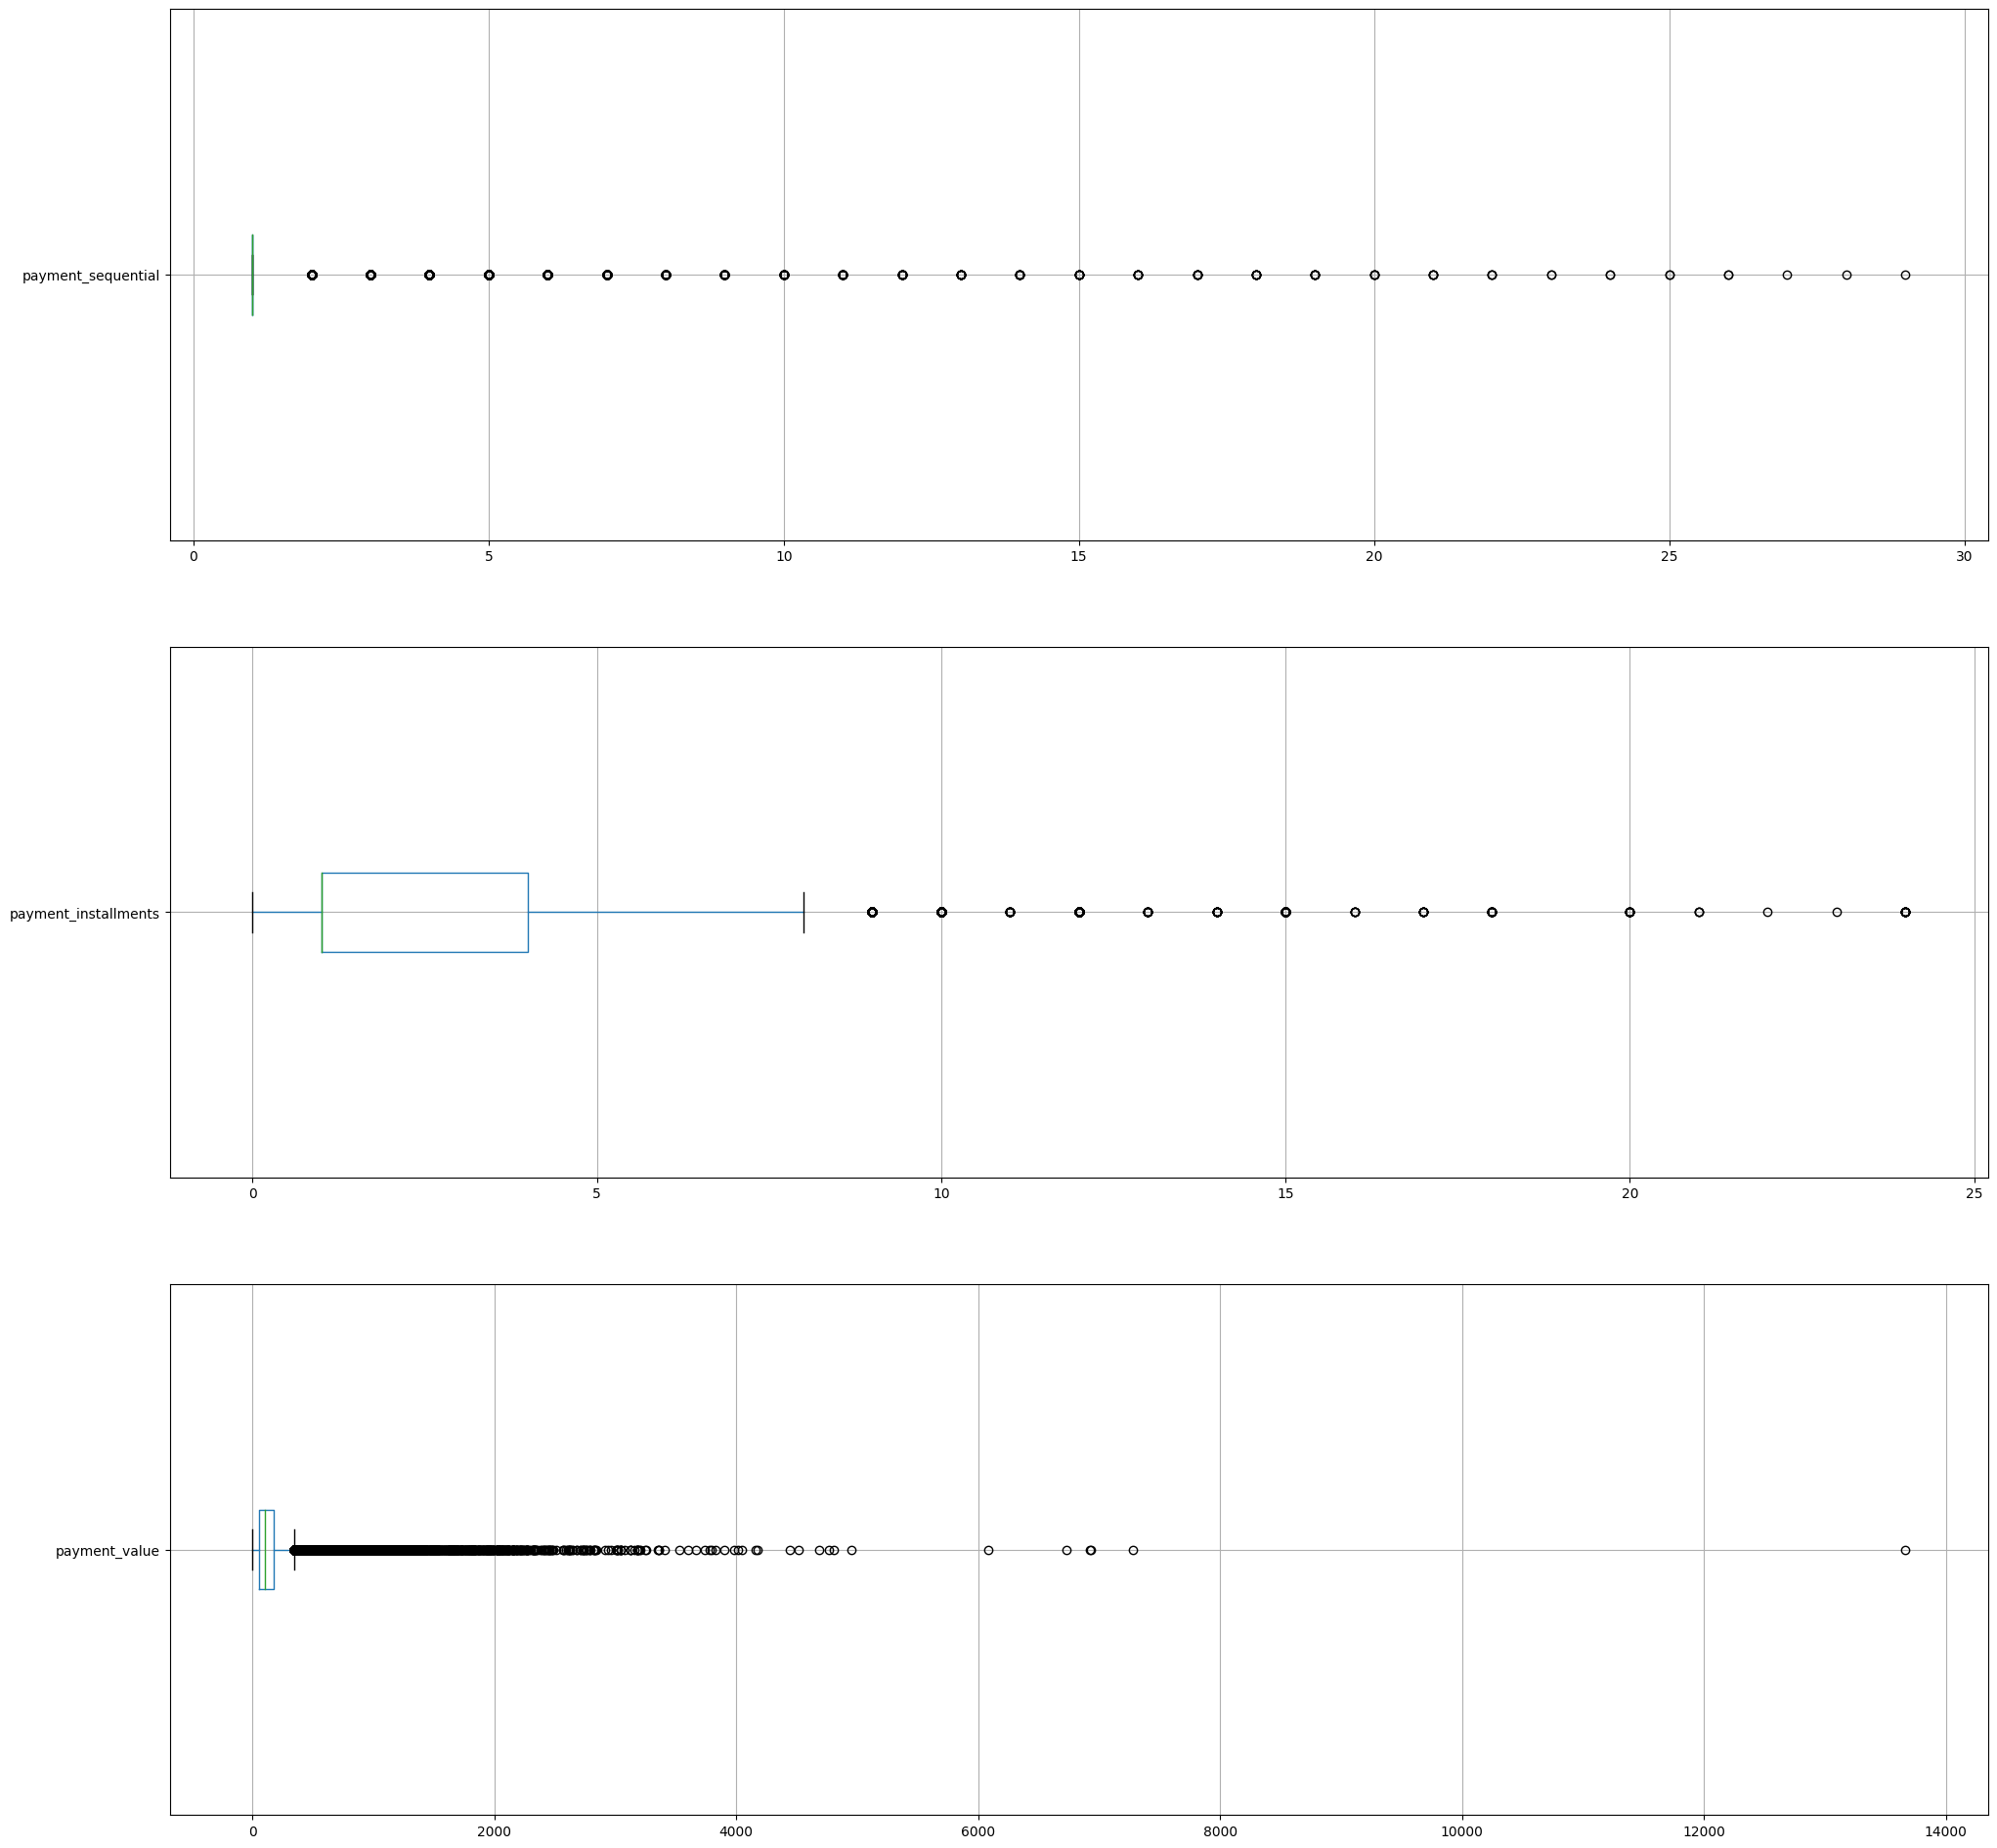

In [54]:
# Visualisasi outlier
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 24))
order_payments_df.boxplot(column='payment_sequential', ax=ax[0], vert=False)
order_payments_df.boxplot(column='payment_installments', ax=ax[1], vert=False)
order_payments_df.boxplot(column='payment_value', ax=ax[2], vert=False)

plt.show()

**Data Order Reviews**

In [55]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [56]:
order_reviews_df[order_reviews_df.review_comment_title.notna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19
99199,40743b46a0ee86375cedb95e82b78d75,3e93213bb8fdda91186b4018b2fe0030,5,OTIMA EMBALAGEM,NaN,2018-08-08 00:00:00,2018-08-08 16:56:16


In [57]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [58]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


**Keputusan:**

Data pada kolom review_comment_title dan review_comment_message tidak akan digunakan untuk analisis sehingga tidak perlu ditangani

In [59]:
# Ubah tipe data kolom review_creation_date dan review_answer_timestamp ke date
# Ubah tipe data kolom shipping_limit_date ke date
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [60]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Data Orders**

In [61]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [62]:
for col in orders_df.order_status.unique():
    display(orders_df[orders_df['order_status'] == col])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaN,NaN,2017-06-06 00:00:00
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaN,NaN,2017-12-20 00:00:00
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaN,NaN,2017-12-18 00:00:00
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaN,NaN,2018-06-05 00:00:00
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaN,NaN,2017-12-15 00:00:00
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaN,NaN,2018-08-17 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaN,NaN,2017-11-23 00:00:00
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaN,NaN,2018-02-02 00:00:00
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaN,NaN,2018-03-13 00:00:00
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaN,NaN,2017-10-27 00:00:00
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaN,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


In [63]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [64]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [65]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


**Keputusan:**

Tidak perlu menangani nilai NaN karna nilai ini muncul tergantung pada beberapa kondisi tertentu pada kolom **order_status**

In [66]:
# Ubah tipe data kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date' ke date
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [67]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Data Produk**

In [68]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [69]:
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


**Keputusan:**

Hapus data yang memiliki nilai NaN pada kolom **product_category_name** karena sulit menentukan kategori produk yang tepat

In [70]:
products_df.dropna(subset=['product_category_name'], inplace=True)

In [71]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [72]:
# Simpan file
products_df.to_csv('Clean Data/products_dt_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Data Customers

In [73]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [74]:
customers_df[customers_df.duplicated(subset=['customer_unique_id'])].customer_unique_id

679      b6c083700ca8c135ba9f0f132930d4e8
1463     a40096fc0a3862e9e12bc55b5f8e6ab2
1607     b8b3c435a58aebd788a477bed8342910
2811     66980c3775537536f77b434d74e520f5
3198     788313d21c3507fe890921f6e17aa679
                       ...               
99324    8bab3162259edfaadd1ea2e1fe7f58dc
99327    12ab9334b1240d6d037f2b0102a49571
99336    0ee57f62666561b72f2ceacad0230cbf
99353    0ceb502fc33a2ad327b08288c5310e2e
99406    5cbfdb85ec130898108b32c50d619c39
Name: customer_unique_id, Length: 3345, dtype: object

In [75]:
customers_df[customers_df['customer_unique_id'] == 'b6c083700ca8c135ba9f0f132930d4e8']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
132,f7c5afab273b47ab517e096e0219b932,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


Informasi:
- Jumlah pelanggan unik yaitu **96096**

In [76]:
customers_df.groupby(by='customer_zip_code_prefix').customer_unique_id.nunique().sort_values(ascending=False)

customer_zip_code_prefix
22790    136
22793    119
24220    114
24230    113
22775    107
        ... 
58302      1
58300      1
58291      1
58286      1
99990      1
Name: customer_unique_id, Length: 14994, dtype: int64

In [77]:
customers_df.groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [78]:
customers_df.groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

Informasi:
- Berdasarkan zip code, customer dominan berasal dari wilayah dengan zip code **136**
- Berdasarkan kota, customer dominan berasal dari kota **sao paulo**
- Berdasarkan state, customer dominan berasal dari state dengan kode **SP**

### Explore Data Geolokasi

In [79]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [80]:
geolocation_df.geolocation_zip_code_prefix.value_counts()

38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [81]:
geolocation_df.geolocation_city.value_counts()

sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: geolocation_city, Length: 8011, dtype: int64

In [82]:
geolocation_df.geolocation_state.value_counts()

SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: geolocation_state, dtype: int64

### Explore Data Order Items

In [83]:
order_items_df.describe(include='all')

C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\199172196.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [84]:
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [85]:
order_items_df.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

Informasi:
- Satu order paling banyak terdiri dari 21 item atau produk

In [86]:
order_items_df.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

Informasi:
- Id produk paling banyak terjual: **aca2eb7d00ea1a7b8ebd4e68314663af**

In [87]:
order_items_df.seller_id.value_counts()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
400f221ab83037c0ea78f1267da9624d       1
1746c1ae87ac63d530c7c943d0ac42e2       1
16bdc8cefd0e32a6f0824d296c5ad14a       1
ace601496e211a664100321f038f50af       1
13d95f0f6f73943d4ceffad0fc2cd32c       1
Name: seller_id, Length: 3095, dtype: int64

Informasi:
- Id seller yang paling banyak menjual produk: **6560211a19b47992c3666cc44a7e94c0**

In [88]:
order_items_df.groupby(by='seller_id').product_id.nunique().sort_values(ascending=False)

seller_id
4a3ca9315b744ce9f8e9374361493884    399
cca3071e3e9bb7d12640c9fbe2301306    322
d91fb3b7d041e83b64a00a3edfb37e4f    315
fa1c13f2614d7b5c4749cbc52fecda94    289
7142540dd4c91e2237acb7e911c4eba2    266
                                   ... 
8b181ee5518df84f18f4e1a43fe07923      1
8b11118053756a9a2932f447e11fc1b5      1
8a1ff5c35f6595a73fef4c7b96e4908a      1
89d9a386b0b6e5fc8403071b03f7206a      1
7d81e74a4755b552267cd5e081563028      1
Name: product_id, Length: 3095, dtype: int64

Informasi:
- Id seller yang menjual berbagai jenis produk paling banyak: **4a3ca9315b744ce9f8e9374361493884** dengna total **399** jenis produk

In [89]:
order_items_df.groupby(by='order_id').agg({
    'order_item_id': ['nunique'],
    'price': ['max', 'min', 'sum'],
    'freight_value': ['max', 'min', 'sum']
}).sort_values(by=('order_item_id', 'nunique'), ascending=False)

order_item_id   price                   \
                                       nunique     max     min      sum   
order_id                                                                  
8272b63d03f5f79c56e9e4120aec44ef            21    7.80    1.20    31.80   
1b15974a0141d54e36626dca3fdc731a            20  100.00  100.00  2000.00   
ab14fdcfbe524636d65ee38360e22ce8            20   98.70   98.70  1974.00   
9ef13efd6949e4573a18964dd1bbe7f5            15   51.00   51.00   765.00   
428a2f660dc84138d969ccd69a0ab6d5            15   65.49   65.49   982.35   
...                                        ...     ...     ...      ...   
5a0911d70c1f85d3bed0df1bf693a6dd             1   59.00   59.00    59.00   
5a082b558a3798d3e36d93bfa8ca1eae             1    9.00    9.00     9.00   
5a07264682e0b8fbb3f166edbbffc6e8             1   19.90   19.90    19.90   
5a071192a28951b76774e5a760c8c9b7             1  899.00  899.00   899.00   
fffe41c64501cc87c801fd61db3f6244             1   43.00   43.00    43.00   

                                 freight_value                  
                                           max     min     sum  
order_id                                                        
8272b63d03f5f79c56e9e4120aec44ef          7.89    6.57  164.37  
1b15974a0141d54e36626dca3fdc731a         10.12   10.12  202.40  
ab14fdcfbe524636d65ee38360e22ce8         14.44   14.44  288.80  
9ef13efd6949e4573a18964dd1bbe7f5          1.20    1.20   18.00  
428a2f660dc84138d969ccd69a0ab6d5         16.22   16.22  243.30  
...                                        ...     ...     ...  
5a0911d70c1f85d3bed0df1bf693a6dd         51.13   51.13   51.13  
5a082b558a3798d3e36d93bfa8ca1eae         15.23   15.23   15.23  
5a07264682e0b8fbb3f166edbbffc6e8         19.32   19.32   19.32  
5a071192a28951b76774e5a760c8c9b7        106.43  106.43  106.43  
fffe41c64501cc87c801fd61db3f6244         12.79   12.79   12.79  

[98666 rows x 7 columns]

Informasi:
- Order dengan total item paling banyak = **21** item, total harga = **31.80**, dan biaya pengiriman = **164.37**

In [90]:
order_items_df.groupby(by='order_id').agg({
    'order_item_id': ['nunique'],
    'price': ['max', 'min', 'sum'],
    'freight_value': ['max', 'min', 'sum']
}).sort_values(by=('price', 'sum'), ascending=False)

order_item_id    price                     \
                                       nunique      max      min       sum   
order_id                                                                     
03caa2c082116e1d31e67e9ae3700499             8  1680.00  1680.00  13440.00   
736e1922ae60d0d6a89247b851902527             4  1790.00  1790.00   7160.00   
0812eb902a67711a1cb742b3cdaa65ae             1  6735.00  6735.00   6735.00   
fefacc66af859508bf1a7934eab1e97f             1  6729.00  6729.00   6729.00   
f5136e38d1a14a4dbd87dff67da82701             1  6499.00  6499.00   6499.00   
...                                        ...      ...      ...       ...   
38bcb524e1c38c2c1b60600a80fc8999             1     2.90     2.90      2.90   
e8bbc1d69fee39eee4c72cb5c969e39d             1     2.29     2.29      2.29   
f1d5c2e6867fa93ceee9ef9b34a53cbf             1     2.20     2.20      2.20   
3ee6513ae7ea23bdfab5b9ab60bffcb5             1     0.85     0.85      0.85   
6e864b3f0ec71031117ad4cf46b7f2a1             1     0.85     0.85      0.85   

                                 freight_value                  
                                           max     min     sum  
order_id                                                        
03caa2c082116e1d31e67e9ae3700499         28.01   28.01  224.08  
736e1922ae60d0d6a89247b851902527         28.72   28.72  114.88  
0812eb902a67711a1cb742b3cdaa65ae        194.31  194.31  194.31  
fefacc66af859508bf1a7934eab1e97f        193.21  193.21  193.21  
f5136e38d1a14a4dbd87dff67da82701        227.66  227.66  227.66  
...                                        ...     ...     ...  
38bcb524e1c38c2c1b60600a80fc8999          8.72    8.72    8.72  
e8bbc1d69fee39eee4c72cb5c969e39d          7.78    7.78    7.78  
f1d5c2e6867fa93ceee9ef9b34a53cbf          7.39    7.39    7.39  
3ee6513ae7ea23bdfab5b9ab60bffcb5         18.23   18.23   18.23  
6e864b3f0ec71031117ad4cf46b7f2a1         18.23   18.23   18.23  

[98666 rows x 7 columns]

Informasi:
- Harga order paling besar = **13440.00**

In [91]:
order_items_df.groupby(by='order_id').agg({
    'order_item_id': ['nunique'],
    'price': ['max', 'min', 'sum'],
    'freight_value': ['max', 'min', 'sum']
}).sort_values(by=('freight_value', 'sum'), ascending=False)

order_item_id   price                   \
                                       nunique     max     min      sum   
order_id                                                                  
cf4659487be50c0c317cff3564c4a840             6  175.00  175.00  1050.00   
2455cbeb73fd04b170ca2504662f95ce             6   69.90   69.90   419.40   
cfed507ac357129f750f05a0d7d71b15             3  460.00  460.00  1380.00   
71dab1155600756af6de79de92e712e3            11  179.99   76.99  1361.89   
17784b9fbb37fb0bdc230d8ed6f6b355             6  140.00  140.00   840.00   
...                                        ...     ...     ...      ...   
3604c194b160cc44b8f540306dc4b644             1   99.90   99.90    99.90   
ecadbb1baca4ac613473d62989309321             1   99.90   99.90    99.90   
a5283d6db4848796b9bea944339d2dca             1  199.00  199.00   199.00   
a52c52c656d3b3ef3ec72fcdc13c714f             1   69.90   69.90    69.90   
12137038d3db1f38197c5d37999527dc             1   99.90   99.90    99.90   

                                 freight_value                   
                                           max     min      sum  
order_id                                                         
cf4659487be50c0c317cff3564c4a840        299.16  299.16  1794.96  
2455cbeb73fd04b170ca2504662f95ce        167.05  167.04  1002.29  
cfed507ac357129f750f05a0d7d71b15        237.11  237.11   711.33  
71dab1155600756af6de79de92e712e3         76.50   40.69   626.64  
17784b9fbb37fb0bdc230d8ed6f6b355         83.83   83.83   502.98  
...                                        ...     ...      ...  
3604c194b160cc44b8f540306dc4b644          0.00    0.00     0.00  
ecadbb1baca4ac613473d62989309321          0.00    0.00     0.00  
a5283d6db4848796b9bea944339d2dca          0.00    0.00     0.00  
a52c52c656d3b3ef3ec72fcdc13c714f          0.00    0.00     0.00  
12137038d3db1f38197c5d37999527dc          0.00    0.00     0.00  

[98666 rows x 7 columns]

Informasi:
- Biaya pengiriman paling besar = **1794.96**

### Explore Data Order Payments

In [92]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [93]:
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [94]:
order_payments_df.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [95]:
order_payments_df.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [96]:
order_payments_df.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [97]:
order_payments_df.groupby(by='payment_type').agg({
    'order_id': ['nunique'],
    'payment_sequential': ['nunique', 'max', 'min'],
    'payment_installments': ['nunique', 'max', 'min'],
    'payment_value': ['max', 'min', 'sum']
})

order_id payment_sequential         payment_installments          \
              nunique            nunique max min              nunique max min   
payment_type                                                                    
boleto          19784                  2   2   1                    1   1   1   
credit_card     76505                  3   3   1                   24  24   0   
debit_card       1528                  3   3   1                    1   1   1   
not_defined         3                  1   1   1                    1   1   1   
voucher          3866                 29  29   1                    1   1   1   

             payment_value                      
                       max    min          sum  
payment_type                                    
boleto             7274.88  11.62   2869361.27  
credit_card       13664.08   0.01  12542084.19  
debit_card         4445.50  13.38    217989.79  
not_defined           0.00   0.00         0.00  
voucher            3184.34   0.00    379436.87

In [98]:
order_payments_df.groupby('order_id').agg({
    'payment_type': ['nunique'],
    'payment_sequential': ['nunique', 'max', 'min'],
    'payment_installments': ['nunique', 'max', 'min'],
    'payment_value': ['max', 'min', 'sum']
}).sort_values(by=('payment_value', 'sum'), ascending=False)

payment_type payment_sequential          \
                                      nunique            nunique max min   
order_id                                                                   
03caa2c082116e1d31e67e9ae3700499            1                  1   1   1   
736e1922ae60d0d6a89247b851902527            1                  1   1   1   
0812eb902a67711a1cb742b3cdaa65ae            1                  1   1   1   
fefacc66af859508bf1a7934eab1e97f            1                  1   1   1   
f5136e38d1a14a4dbd87dff67da82701            1                  1   1   1   
...                                       ...                ...  ..  ..   
e8bbc1d69fee39eee4c72cb5c969e39d            1                  1   1   1   
f1d5c2e6867fa93ceee9ef9b34a53cbf            2                  2   2   1   
c8c528189310eaa44a745b8d9d26908b            1                  1   1   1   
00b1cb0320190ca0daa2c88b35206009            1                  1   1   1   
4637ca194b6387e2d538dc89b124b0ee            1                  1   1   1   

                                 payment_installments         payment_value  \
                                              nunique max min           max   
order_id                                                                      
03caa2c082116e1d31e67e9ae3700499                    1   1   1      13664.08   
736e1922ae60d0d6a89247b851902527                    1   1   1       7274.88   
0812eb902a67711a1cb742b3cdaa65ae                    1   8   8       6929.31   
fefacc66af859508bf1a7934eab1e97f                    1   1   1       6922.21   
f5136e38d1a14a4dbd87dff67da82701                    1   1   1       6726.66   
...                                               ...  ..  ..           ...   
e8bbc1d69fee39eee4c72cb5c969e39d                    1   1   1         10.07   
f1d5c2e6867fa93ceee9ef9b34a53cbf                    1   1   1          9.28   
c8c528189310eaa44a745b8d9d26908b                    1   1   1          0.00   
00b1cb0320190ca0daa2c88b35206009                    1   1   1          0.00   
4637ca194b6387e2d538dc89b124b0ee                    1   1   1          0.00   

                                                      
                                       min       sum  
order_id                                              
03caa2c082116e1d31e67e9ae3700499  13664.08  13664.08  
736e1922ae60d0d6a89247b851902527   7274.88   7274.88  
0812eb902a67711a1cb742b3cdaa65ae   6929.31   6929.31  
fefacc66af859508bf1a7934eab1e97f   6922.21   6922.21  
f5136e38d1a14a4dbd87dff67da82701   6726.66   6726.66  
...                                    ...       ...  
e8bbc1d69fee39eee4c72cb5c969e39d     10.07     10.07  
f1d5c2e6867fa93ceee9ef9b34a53cbf      0.31      9.59  
c8c528189310eaa44a745b8d9d26908b      0.00      0.00  
00b1cb0320190ca0daa2c88b35206009      0.00      0.00  
4637ca194b6387e2d538dc89b124b0ee      0.00      0.00  

[99440 rows x 10 columns]

### Explore Order Reviews

In [99]:
order_reviews_df.describe(include='all')

C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\4160979606.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include='all')
C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\4160979606.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_df.describe(include='all')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [100]:
order_reviews_df.sort_values(by='review_score', ascending=False)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
81664,d79d9c6ac6f454d1eff978ce1c0042f3,067546963d2dc6275eb550df0482c460,5,NaN,Gostei muito da loja lannister\r\nObrigada,2018-03-02,2018-03-03 01:47:34
41507,2f307de2f202f80e40bb3e333acacdc5,b3a0eb2ed8d1c40cb723235fc937b654,5,NaN,NaN,2018-04-24,2018-04-25 06:43:14
41493,2aae6aa6dd84780f8af3d7c6bceca0b3,0997090fe6882d45c6a71660aaffaba2,5,NaN,Excelente. Entrega antes do prazo.,2018-03-13,2018-03-13 19:38:15
76470,c5c3e1db9a9b68b9c5491119316298b6,bd9c7d72943c5118f03bb7524043e0fd,5,Excelente,"Já fiz várias compras com as lojas lannister, ...",2018-08-30,2018-08-30 22:27:11
41496,d90bcfae67fa691807ba9777005fc1f3,a34caabc66a97d7d5228c0c98789ea62,5,NaN,"Muito satisfeita, eu amei minha prancha malina 😍",2018-01-12,2018-01-12 22:22:03
...,...,...,...,...,...,...,...
88349,ceb0ed8e3dbbea01d9b79a531140f9f0,3162e7a4bd72ecb02f89eba7df43673e,1,Entrega pela metade.,Comprei um whey protein e uma creatina e somen...,2018-05-06,2018-05-11 18:41:46
73809,0a17a80d17d08afa96fcf81a39c32c62,5541bd42a3108b24d82380b08016016c,1,NaN,Comprei um produto e me encaminharam outro. Es...,2018-02-22,2018-02-22 20:57:49
88351,5aff478bcf049564022294737e8890c0,562f45bf4a946810053214c29d752e85,1,Não é original Microsoft,Produto genérico,2018-04-26,2018-04-26 23:37:34
46329,459ca96310cf869cc4b8e4705f756256,67b0f3d0a405fc007841f73f2792323b,1,Negativo,Não vi nem a cor dele,2018-08-09,2018-08-11 10:20:37


In [101]:
order_reviews_df.groupby('review_score').order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

Informasi:
- Jumlah pesanan yang mendapat review bintang 5: **57076**
- Jumlah pesanan yang mendapat review bintang 1: **11393**

### Explore Data Order

In [102]:
orders_df.describe(include='all')

C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
C:\Users\ACER\AppData\Local\Temp\ipykernel_12428\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future beh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [103]:
orders_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### Explore Data Product Category

In [104]:
product_category_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore Data Product

In [105]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [106]:
total_product_by_category = pd.merge(products_df, product_category_df, on='product_category_name', how='left')
total_product_by_category.groupby('product_category_name_english').product_id.nunique().sort_values(ascending=False).reset_index()

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,home_comfort_2,5
68,fashion_childrens_clothes,5
69,security_and_services,2


Informasi:
- Jenis produk paling banyak yaitu **bed bath table**

### Explore Data Sellers

In [107]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [108]:
sellers_df.groupby('seller_city').seller_id.nunique().sort_values(ascending=False).reset_index()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


In [109]:
sellers_df.groupby('seller_state').seller_id.nunique().sort_values(ascending=False).reset_index()

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


Informasi:
- Kebanyakan seller berasal dari Kota **Sao Paulo** dan state **SP**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue dalam beberapa bulan terakhir?

In [110]:
# Merge data
orders_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
orders_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16


In [111]:
# Ambil order dengan status 'delivered'
orders_payments_df = orders_payments_df[orders_payments_df['order_status'] == 'delivered']
orders_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16


In [112]:
# Jumlah produk terjual dan total pendapatan
monthly_orders_df = orders_payments_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
})

monthly_orders_df

,order_id,payment_value
order_purchase_timestamp,,
2016-10-31,265,46566.71
2016-11-30,0,0.00
2016-12-31,1,19.62
2017-01-31,750,127545.67
2017-02-28,1653,271298.65
2017-03-31,2546,414369.39
2017-04-30,2303,390952.18
2017-05-31,3546,567066.73
2017-06-30,3135,490225.60


In [113]:
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

In [114]:
monthly_orders_df

,order_id,payment_value
order_purchase_timestamp,,
2016-10,265,46566.71
2016-11,0,0.00
2016-12,1,19.62
2017-01,750,127545.67
2017-02,1653,271298.65
2017-03,2546,414369.39
2017-04,2303,390952.18
2017-05,3546,567066.73
2017-06,3135,490225.60


In [115]:
monthly_orders_df = monthly_orders_df.reset_index()

In [116]:
monthly_orders_df

,order_purchase_timestamp,order_id,payment_value
0,2016-10,265,46566.71
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,127545.67
4,2017-02,1653,271298.65
5,2017-03,2546,414369.39
6,2017-04,2303,390952.18
7,2017-05,3546,567066.73
8,2017-06,3135,490225.60
9,2017-07,3872,566403.93


In [117]:
monthly_orders_df.rename(columns={
    'order_purchase_timestamp': 'order_date',
    'order_id': 'order_count',
    'payment_value': 'revenue'
}, inplace=True)

monthly_orders_df.head()

,order_date,order_count,revenue
0,2016-10,265,46566.71
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,127545.67
4,2017-02,1653,271298.65


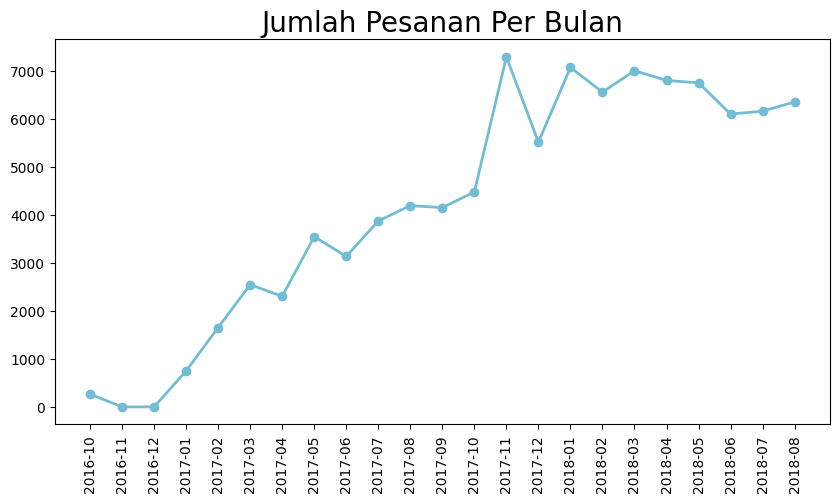

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df['order_date'], monthly_orders_df['order_count'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Jumlah Pesanan Per Bulan', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

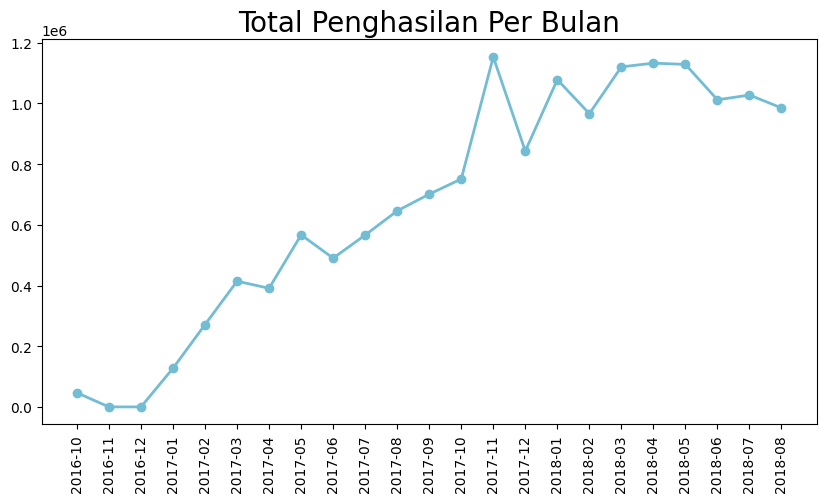

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df['order_date'], monthly_orders_df['revenue'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Penghasilan Per Bulan', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [120]:
order_items_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [121]:
# Merge data
products_categories_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='inner',
    left_on='product_category_name',
    right_on='product_category_name'
)

products_categories_order_items_df = pd.merge(
    left=order_items_df,
    right=products_categories_df,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)

display(products_categories_df.head(), products_categories_order_items_df.head())


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [122]:
product_order_count = products_categories_order_items_df.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False).reset_index()
product_order_count

,product_category_name_english,order_id
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


In [123]:
product_order_count.rename(columns={
    'product_category_name_english': 'product_category',
    'order_id': 'order_count',
}, inplace=True)

product_order_count.head()

,product_category,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


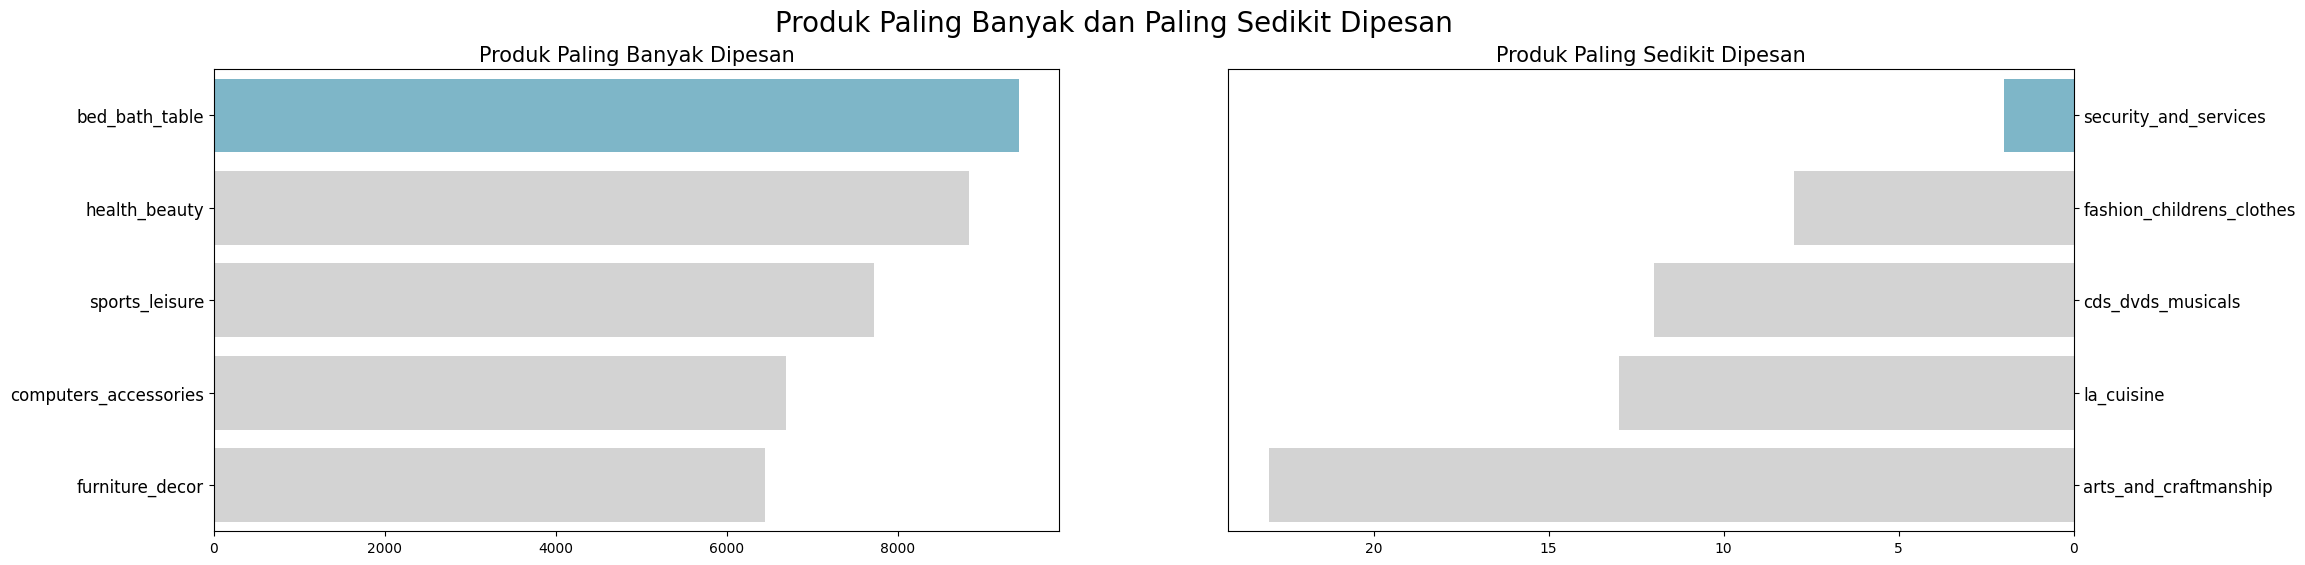

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='order_count', y='product_category', data=product_order_count.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Produk Paling Banyak Dipesan', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='order_count', y='product_category', data=product_order_count.sort_values(by='order_count', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Produk Paling Sedikit Dipesan', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Produk Paling Banyak dan Paling Sedikit Dipesan', fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana demografi pelanggan?

In [125]:
bycity_df = customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).reset_index()
bycity_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bycity_df.head()

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


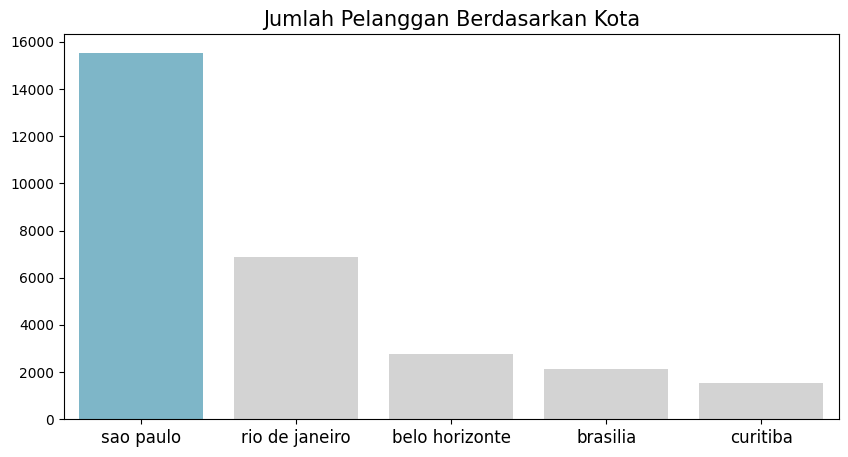

In [126]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='customer_count',
    x='customer_city',
    data=bycity_df.head(),
    palette=colors
)
plt.title('Jumlah Pelanggan Berdasarkan Kota', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [127]:
bystate_df = customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bystate_df.head()

,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


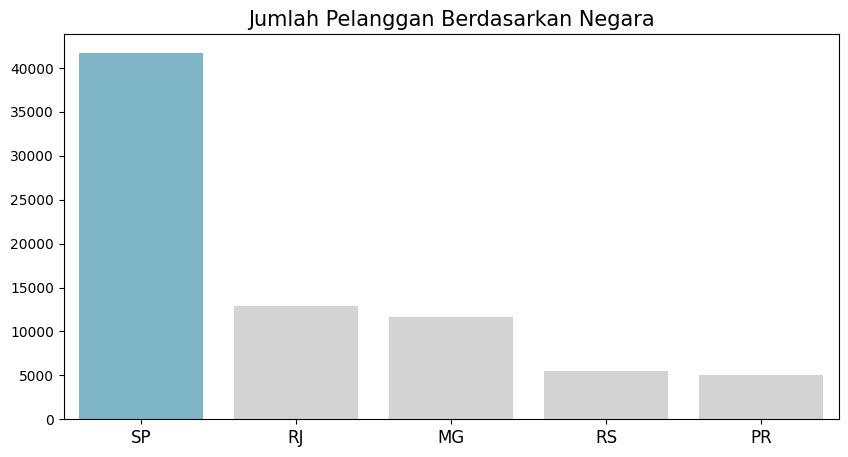

In [128]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='customer_count',
    x='customer_state',
    data=bystate_df.head(),
    palette=colors
)
plt.title('Jumlah Pelanggan Berdasarkan Negara', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Apa pola pembelian yang paling umum dari pelanggan di berbagai lokasi geografis?

In [129]:
# Merge data customer dengan order
customers_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [130]:
orders_by_city = customers_orders_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index()
orders_by_city.rename(columns={
    'order_id': 'order_count'
}, inplace=True)

orders_by_city.head()

,customer_city,order_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


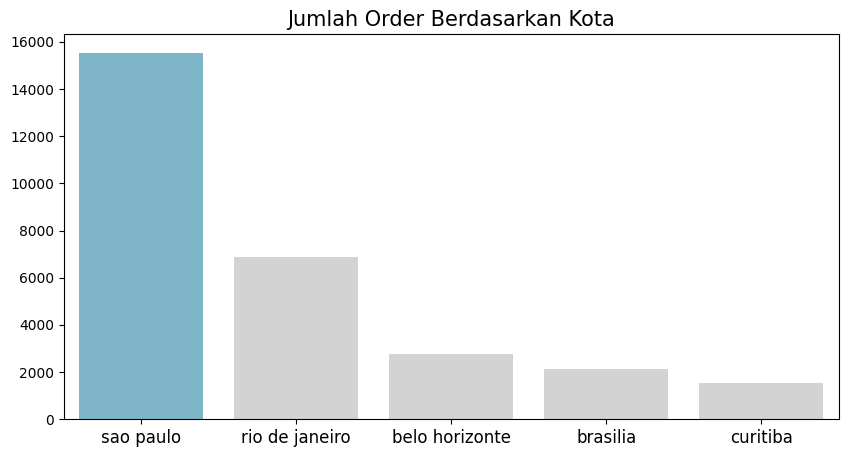

In [131]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='order_count',
    x='customer_city',
    data=orders_by_city.head(),
    palette=colors
)
plt.title('Jumlah Order Berdasarkan Kota', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [132]:
orders_by_state = customers_orders_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).reset_index()
orders_by_state.rename(columns={
    'order_id': 'order_count'
}, inplace=True)

orders_by_state.head()

,customer_state,order_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


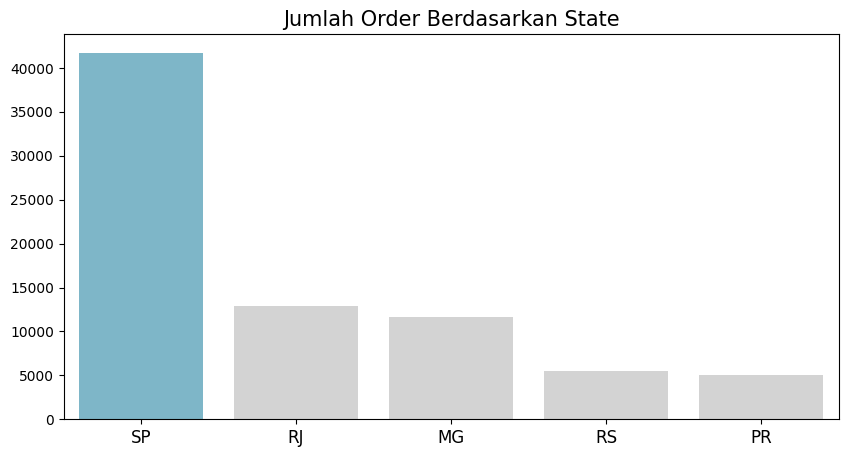

In [133]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y='order_count',
    x='customer_state',
    data=orders_by_state.head(),
    palette=colors
)
plt.title('Jumlah Order Berdasarkan State', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 5: Bagaimana korelasi antara lokasi geografis pelanggan dengan jenis produk yang mereka beli?

In [134]:
orders_products_category = pd.merge(
    left=orders_df,
    right=products_categories_order_items_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

orders_products_category.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [135]:
customers_orders_products_category = pd.merge(
    left=orders_products_category,
    right=customers_df,
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

customers_orders_products_category.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [136]:
product_category_by_city = customers_orders_products_category.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'order_id': 'nunique'
}).sort_values(by=('order_id'), ascending=False)
product_category_by_city.reset_index(inplace=True)
product_category_by_city.rename(columns={
    'order_id': 'order_count'
}, inplace=True)
product_category_by_city

,customer_city,product_category_name_english,order_count
0,sao paulo,bed_bath_table,1653
1,sao paulo,health_beauty,1533
2,sao paulo,sports_leisure,1266
3,sao paulo,housewares,1107
4,sao paulo,computers_accessories,1004
...,...,...,...
25194,irai de minas,stationery,1
25195,irai de minas,home_appliances_2,1
25196,irai,housewares,1
25197,irai,computers_accessories,1


In [137]:
list_customer_city = product_category_by_city.customer_city.unique().tolist()
list_customer_city[0:10]

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'brasilia',
 'porto alegre',
 'campinas',
 'curitiba',
 'salvador',
 'guarulhos',
 'sao bernardo do campo']

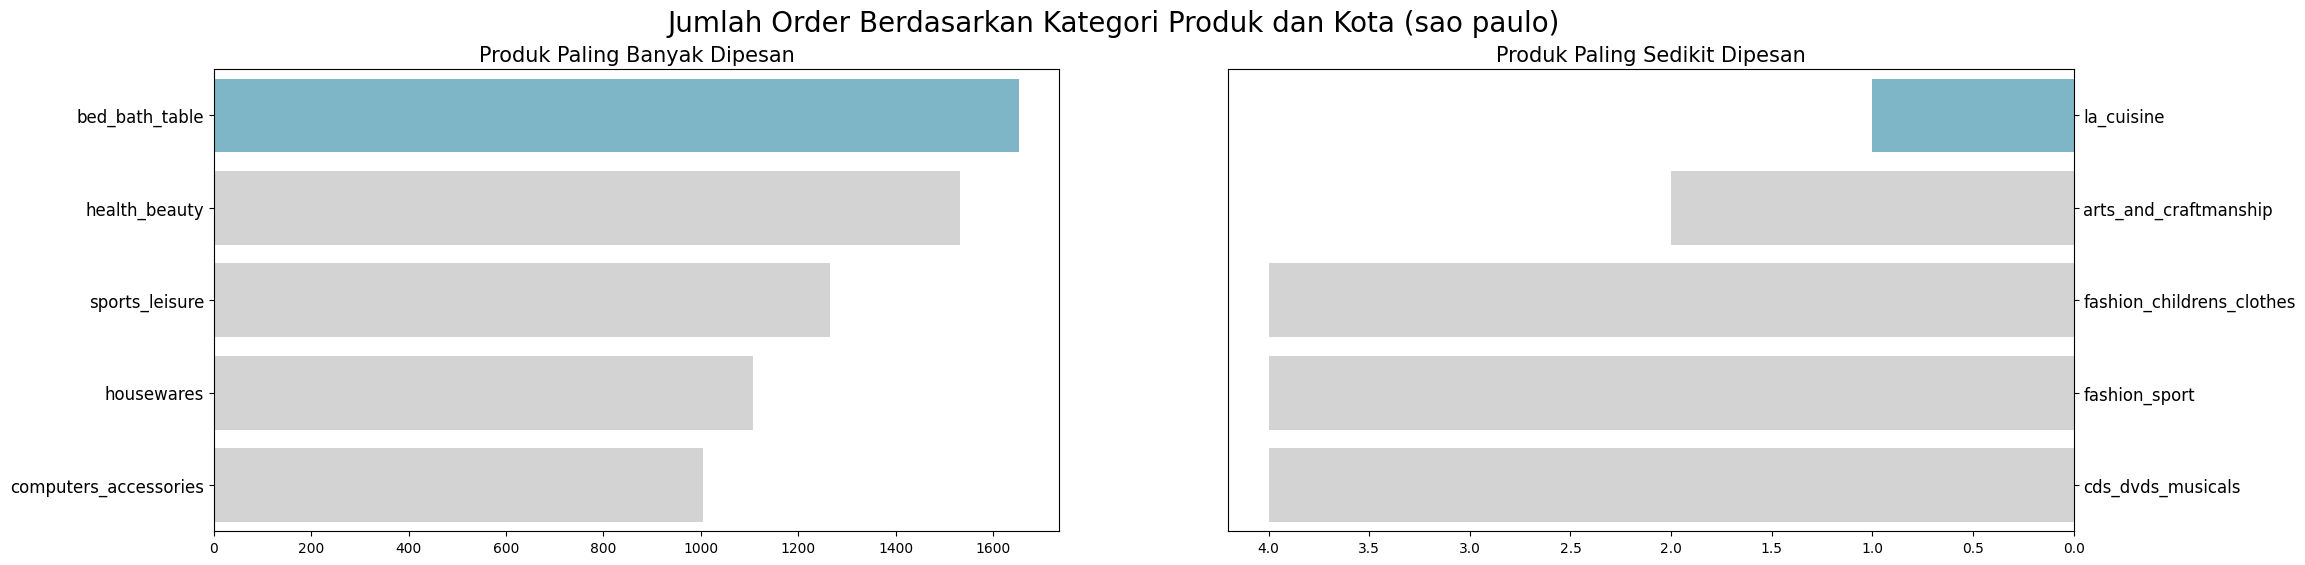

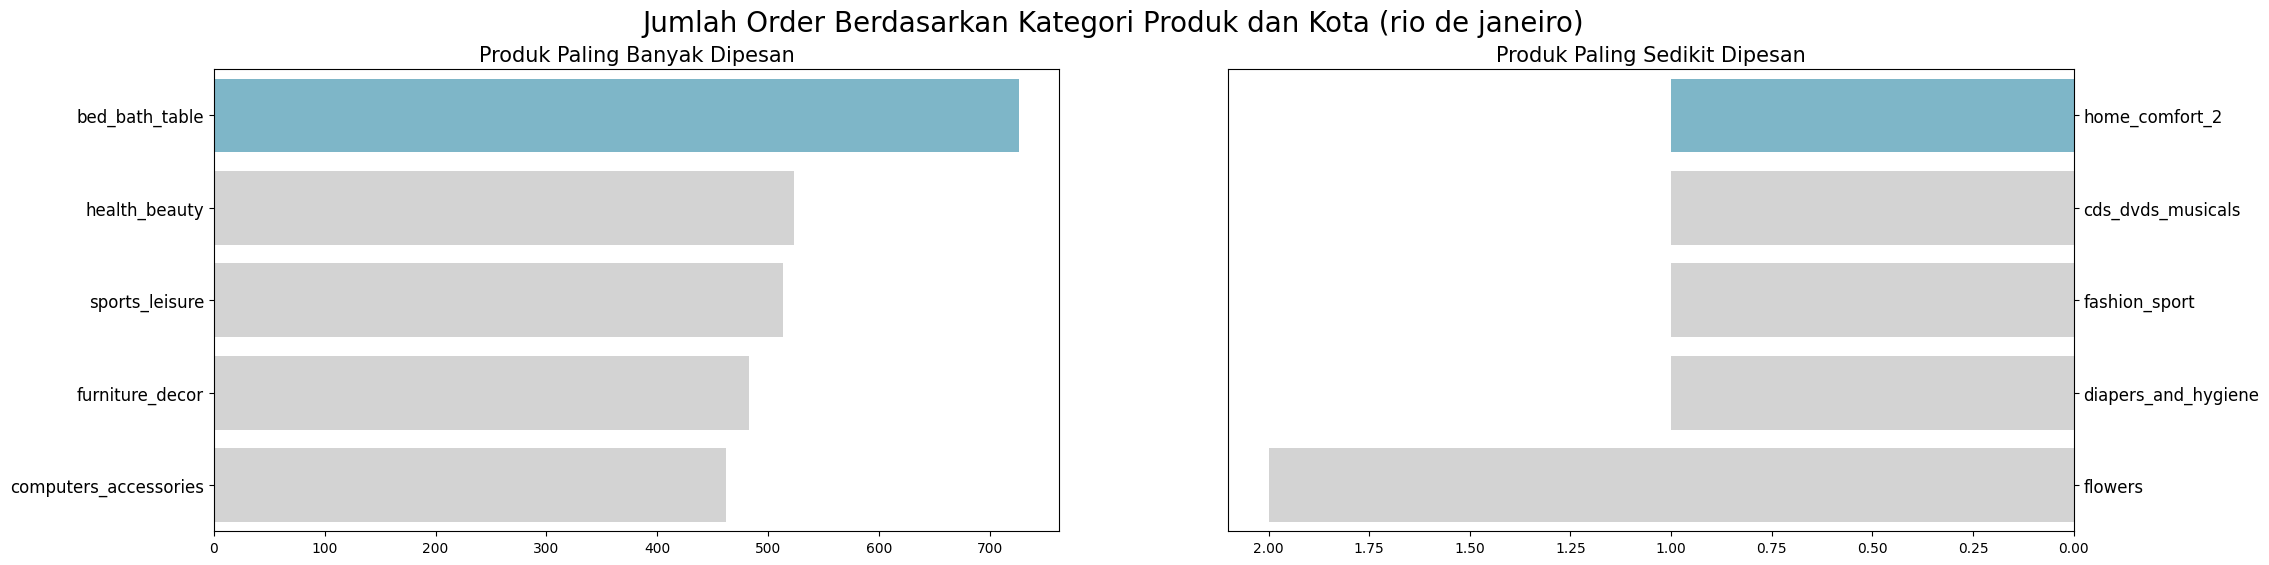

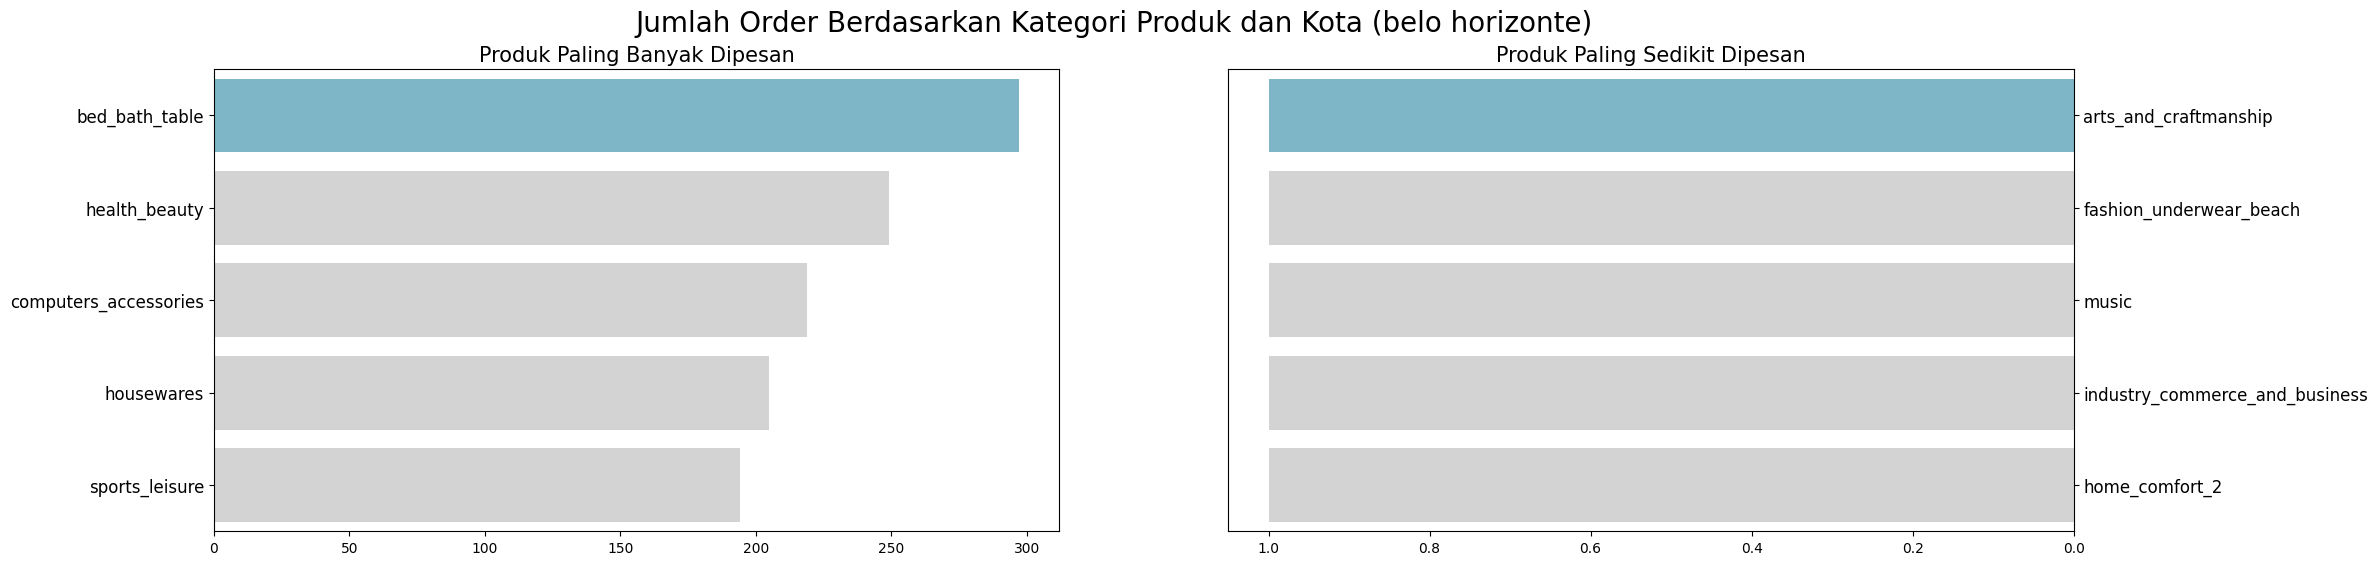

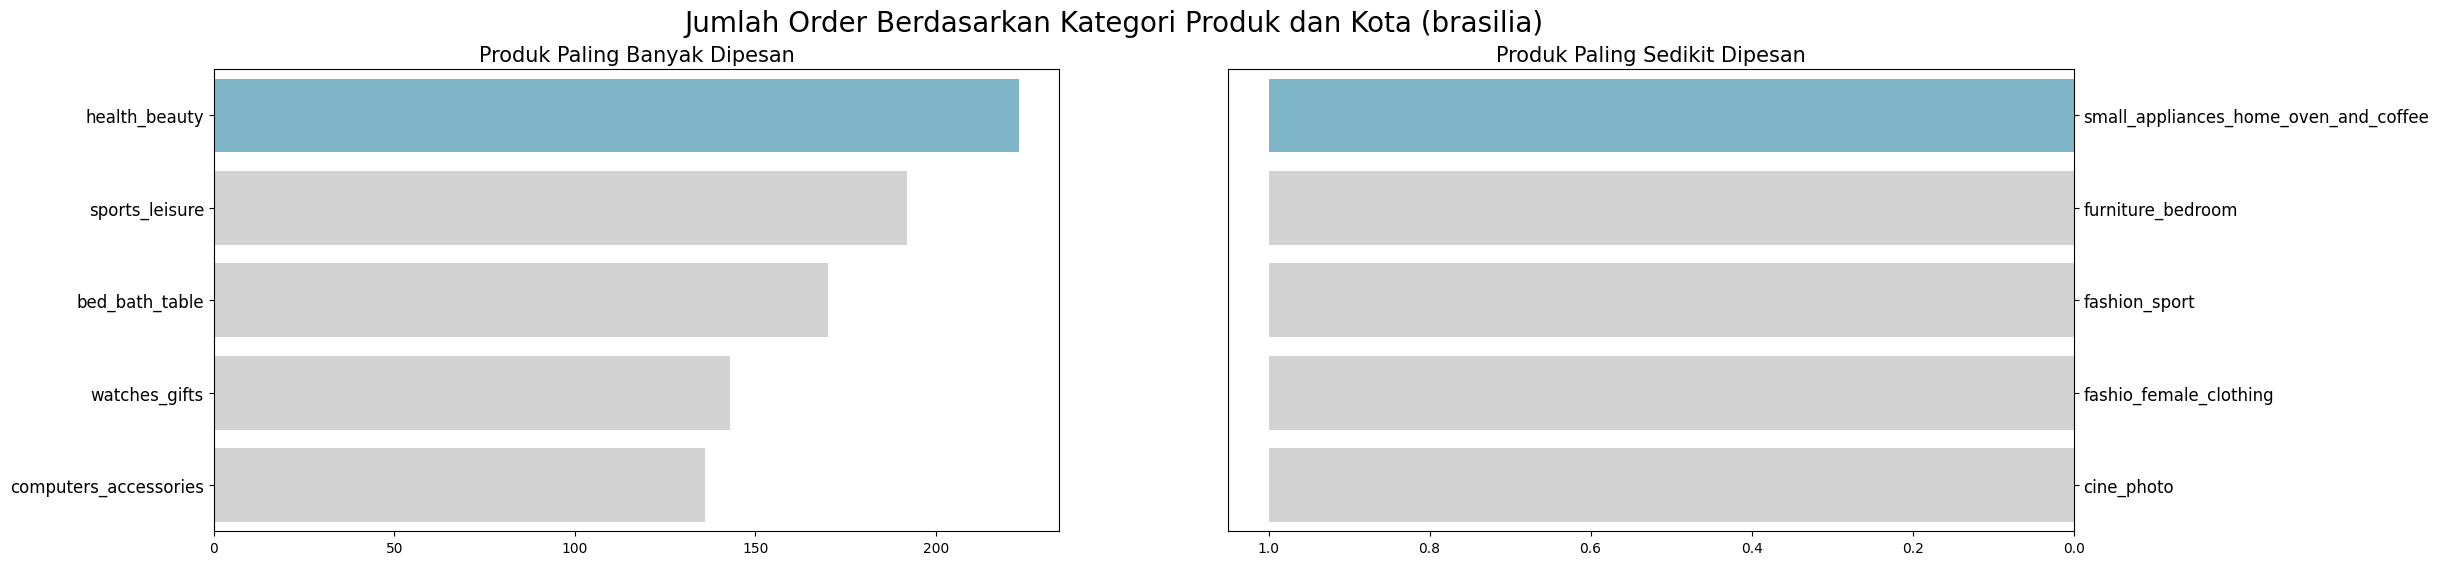

In [138]:
for city in list_customer_city[0:4]:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

    colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

    sns.barplot(x='order_count', y='product_category_name_english', data=product_category_by_city[product_category_by_city['customer_city'] == city].head(5), palette=colors, ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel(None)
    ax[0].set_title('Produk Paling Banyak Dipesan', loc='center', fontsize=15)
    ax[0].tick_params(axis='y', labelsize=12)

    sns.barplot(x='order_count', y='product_category_name_english', data=product_category_by_city[product_category_by_city['customer_city'] == city].sort_values(by='order_count', ascending=True).head(5), palette=colors, ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel(None)
    ax[1].invert_xaxis()
    ax[1].yaxis.set_label_position('right')
    ax[1].yaxis.tick_right()
    ax[1].set_title('Produk Paling Sedikit Dipesan', loc='center', fontsize=15)
    ax[1].tick_params(axis='y', labelsize=12)

    plt.suptitle('Jumlah Order Berdasarkan Kategori Produk dan Kota ('+city+')', fontsize=20)
    plt.show()

In [139]:
product_category_by_state = customers_orders_products_category.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'order_id': 'nunique'
}).sort_values(by=('order_id'), ascending=False)
product_category_by_state.reset_index(inplace=True)
product_category_by_state.rename(columns={
    'order_id': 'order_count'
}, inplace=True)
product_category_by_state

,customer_state,product_category_name_english,order_count
0,SP,bed_bath_table,4416
1,SP,health_beauty,3789
2,SP,sports_leisure,3296
3,SP,housewares,2781
4,SP,furniture_decor,2724
...,...,...,...
1351,DF,music,1
1352,AP,computers,1
1353,PA,audio,1
1354,PA,books_imported,1


In [140]:
list_customer_state = product_category_by_state.customer_state.unique().tolist()
list_customer_state[0:10]

['SP', 'RJ', 'MG', 'RS', 'PR', 'BA', 'SC', 'PE', 'DF', 'GO']

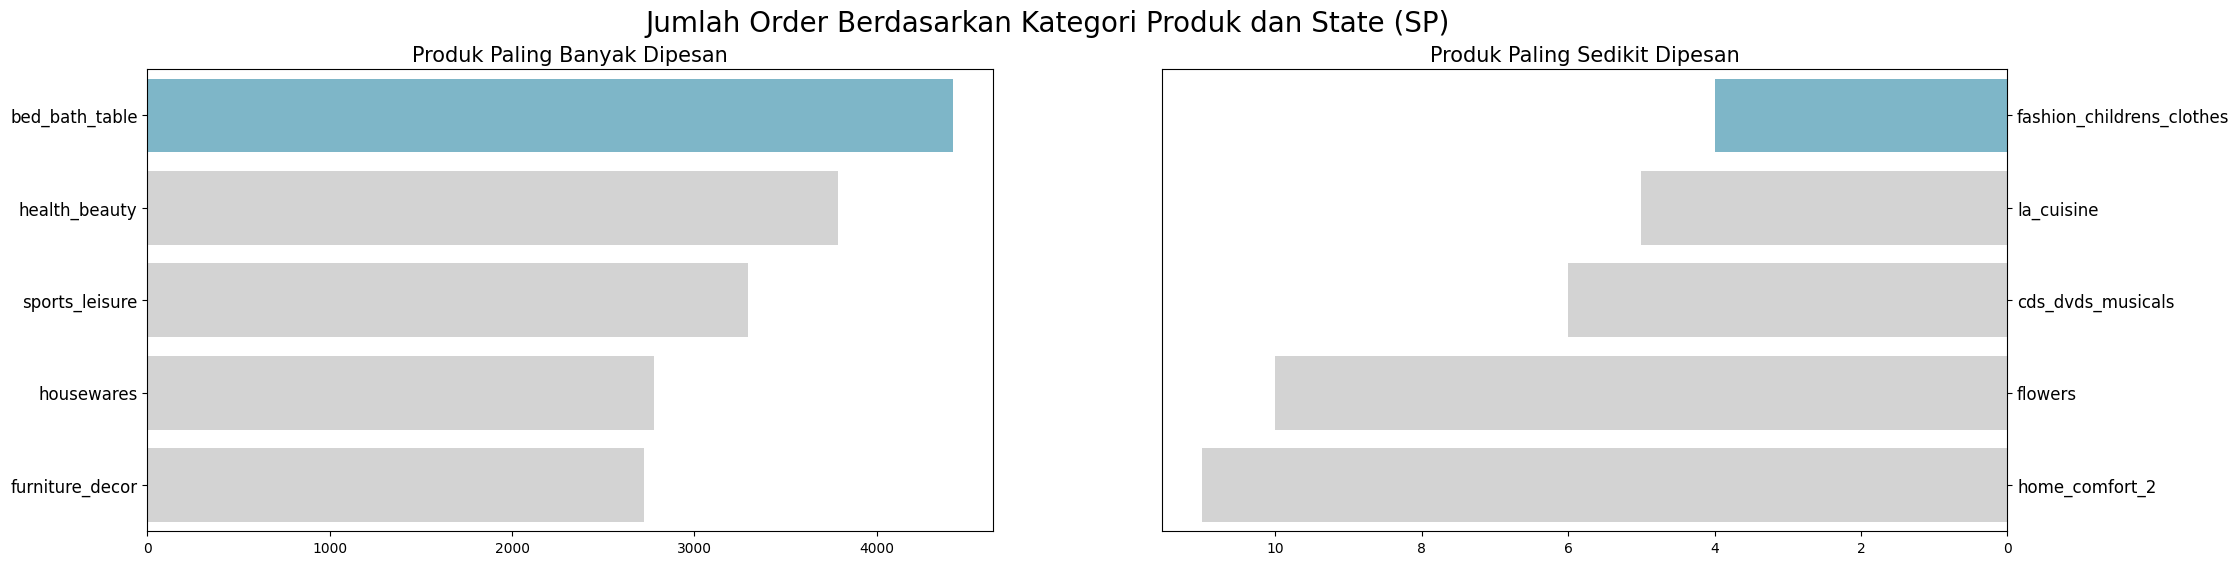

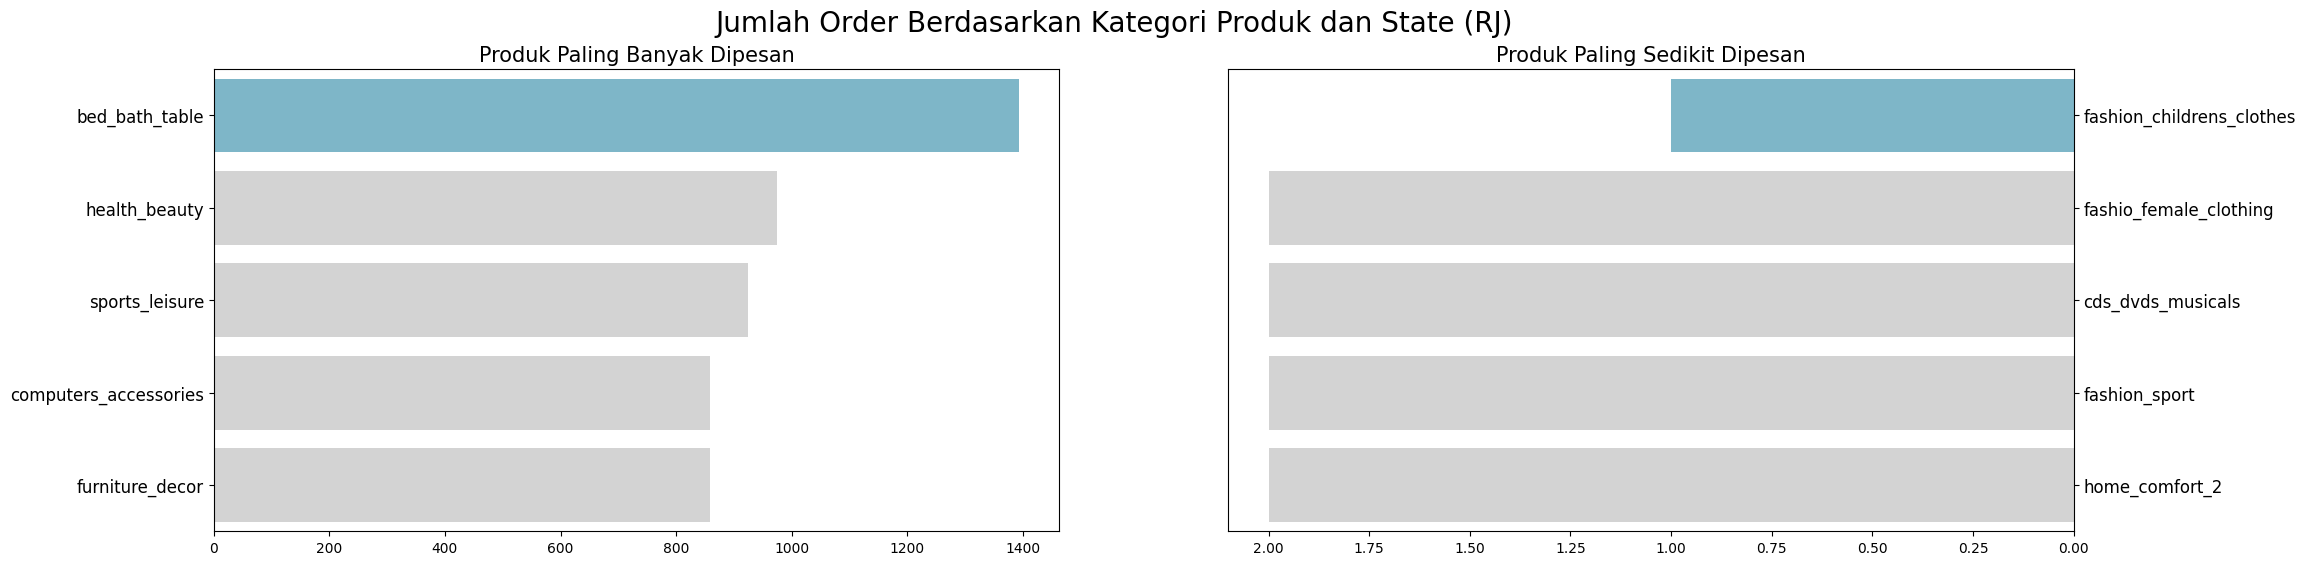

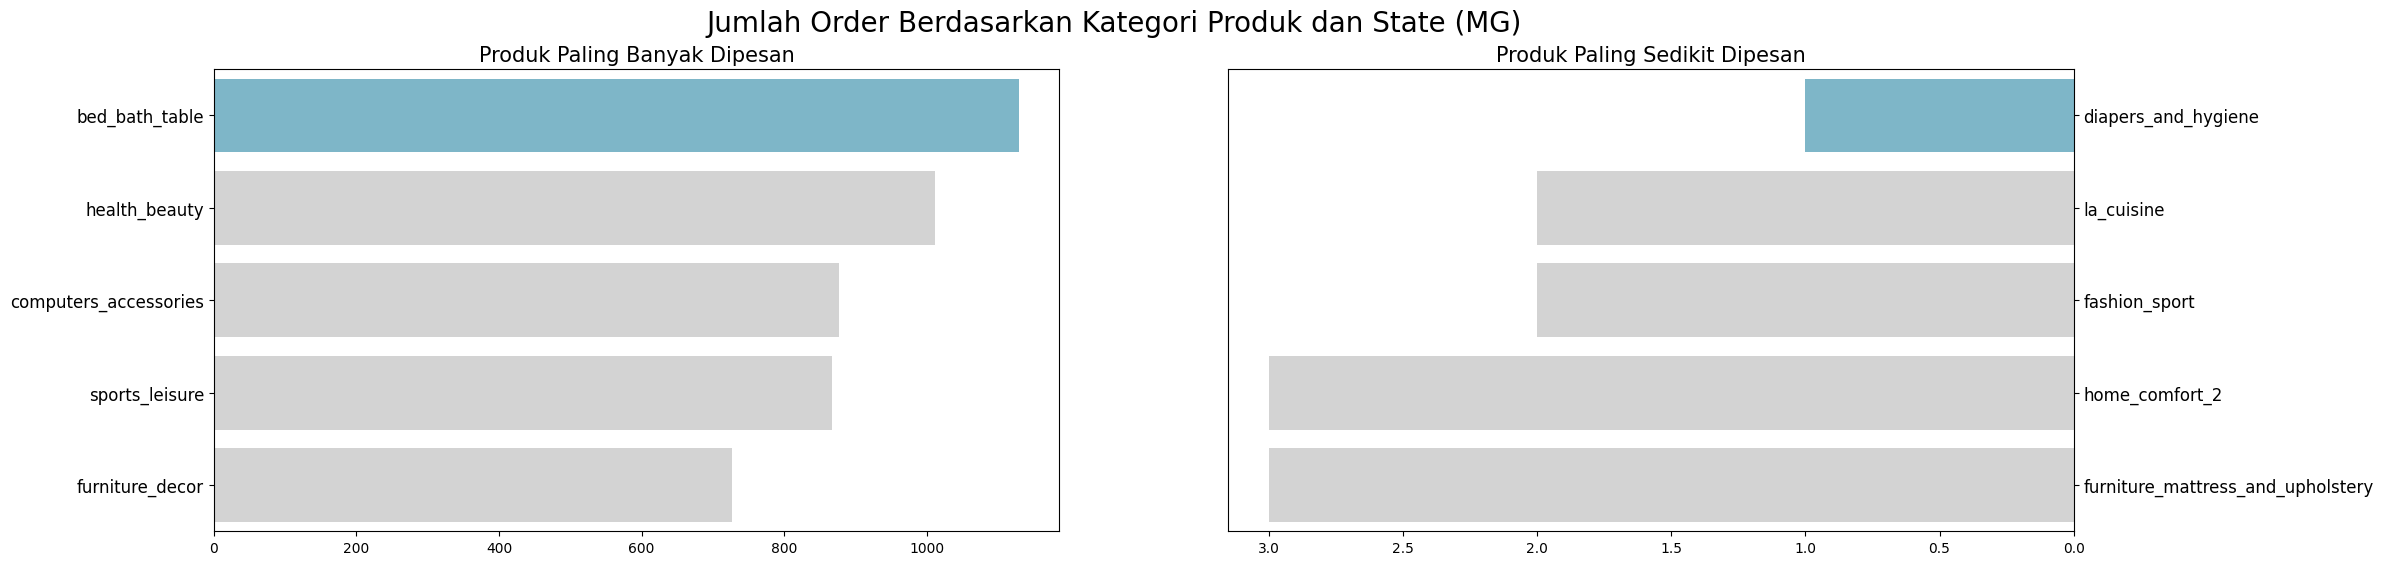

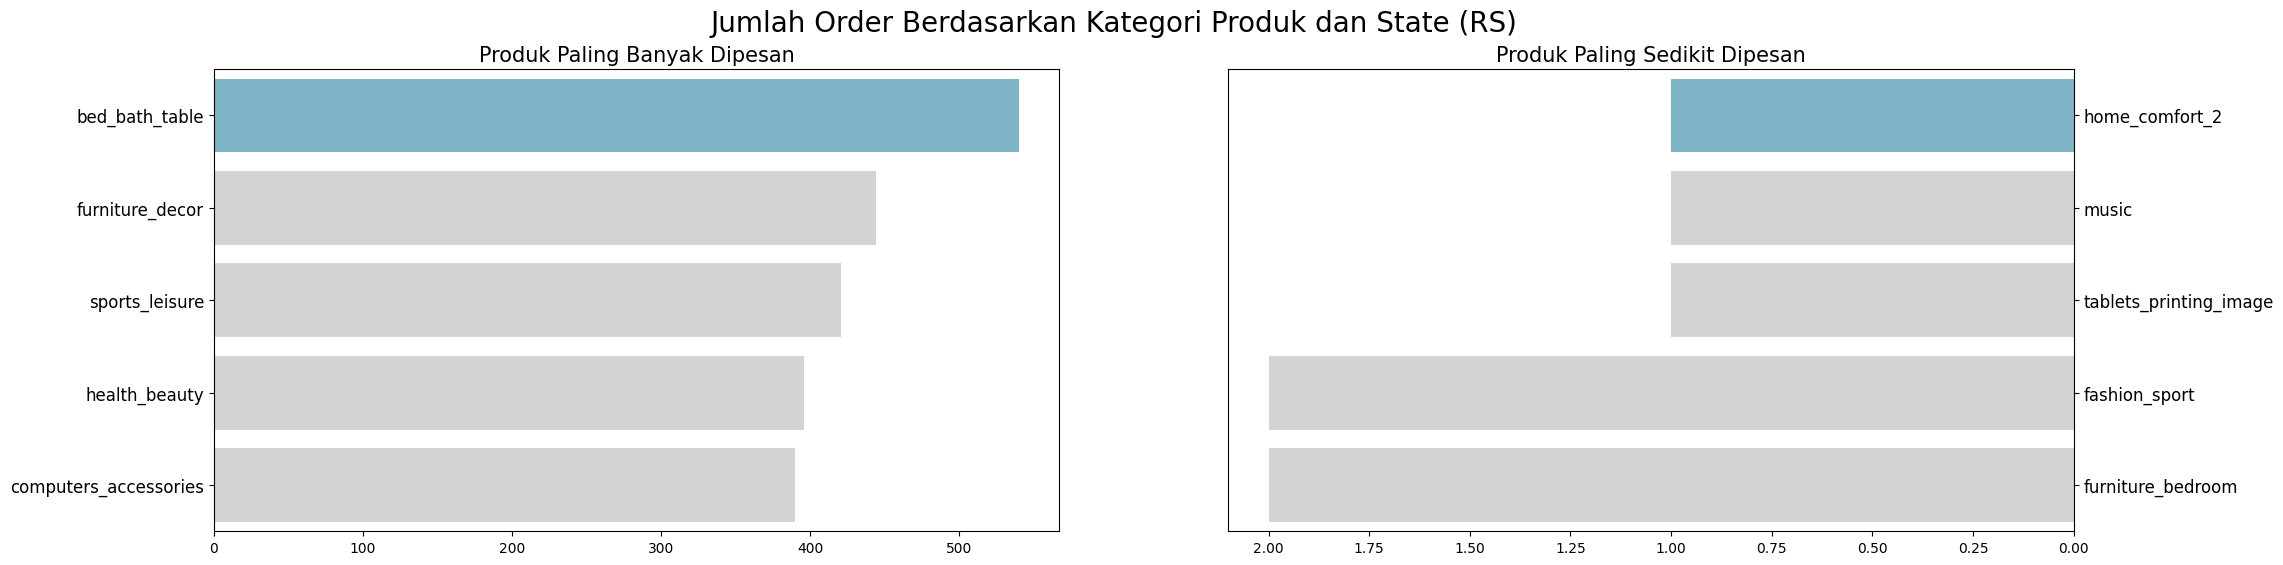

In [141]:
for state in list_customer_state[0:4]:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

    colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

    sns.barplot(x='order_count', y='product_category_name_english', data=product_category_by_state[product_category_by_state['customer_state'] == state].head(5), palette=colors, ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel(None)
    ax[0].set_title('Produk Paling Banyak Dipesan', loc='center', fontsize=15)
    ax[0].tick_params(axis='y', labelsize=12)

    sns.barplot(x='order_count', y='product_category_name_english', data=product_category_by_state[product_category_by_state['customer_state'] == state].sort_values(by='order_count', ascending=True).head(5), palette=colors, ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel(None)
    ax[1].invert_xaxis()
    ax[1].yaxis.set_label_position('right')
    ax[1].yaxis.tick_right()
    ax[1].set_title('Produk Paling Sedikit Dipesan', loc='center', fontsize=15)
    ax[1].tick_params(axis='y', labelsize=12)

    plt.suptitle('Jumlah Order Berdasarkan Kategori Produk dan State ('+state+')', fontsize=20)
    plt.show()

### Pertanyaan 6: Bagaimana persebaran ulasan produk berdasarkan kategori produk?

In [142]:
orders_products_category.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [143]:
order_reviews_product_category = pd.merge(
    left=order_reviews_df,
    right=orders_products_category,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

order_reviews_product_category.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [144]:
# Ubah tipe data kolom shipping_limit_date ke date
category_columns = ["review_score"]
 
for column in category_columns:
  order_reviews_product_category[column] = order_reviews_product_category[column].astype(str)

In [145]:
reviews_by_product_category = order_reviews_product_category.groupby(by=['review_score', 'product_category_name_english']).agg({
    'order_id': 'nunique'
}).sort_values(by=('order_id'), ascending=False)
reviews_by_product_category.reset_index(inplace=True)
reviews_by_product_category

,review_score,product_category_name_english,order_id
0,5,health_beauty,5398
1,5,bed_bath_table,4980
2,5,sports_leisure,4646
3,5,computers_accessories,3703
4,5,furniture_decor,3587
...,...,...,...
335,3,cds_dvds_musicals,1
336,4,la_cuisine,1
337,3,costruction_tools_tools,1
338,3,dvds_blu_ray,1


In [146]:
reviews_by_product_category[reviews_by_product_category['review_score'] == '1'].head()

,review_score,product_category_name_english,order_id
21,1,bed_bath_table,1191
28,1,health_beauty,898
29,1,computers_accessories,850
30,1,furniture_decor,828
32,1,sports_leisure,806


In [147]:
list_review_score = reviews_by_product_category.review_score.unique().tolist()
list_review_score.sort(reverse=True)
print(list_review_score)

['5', '4', '3', '2', '1']


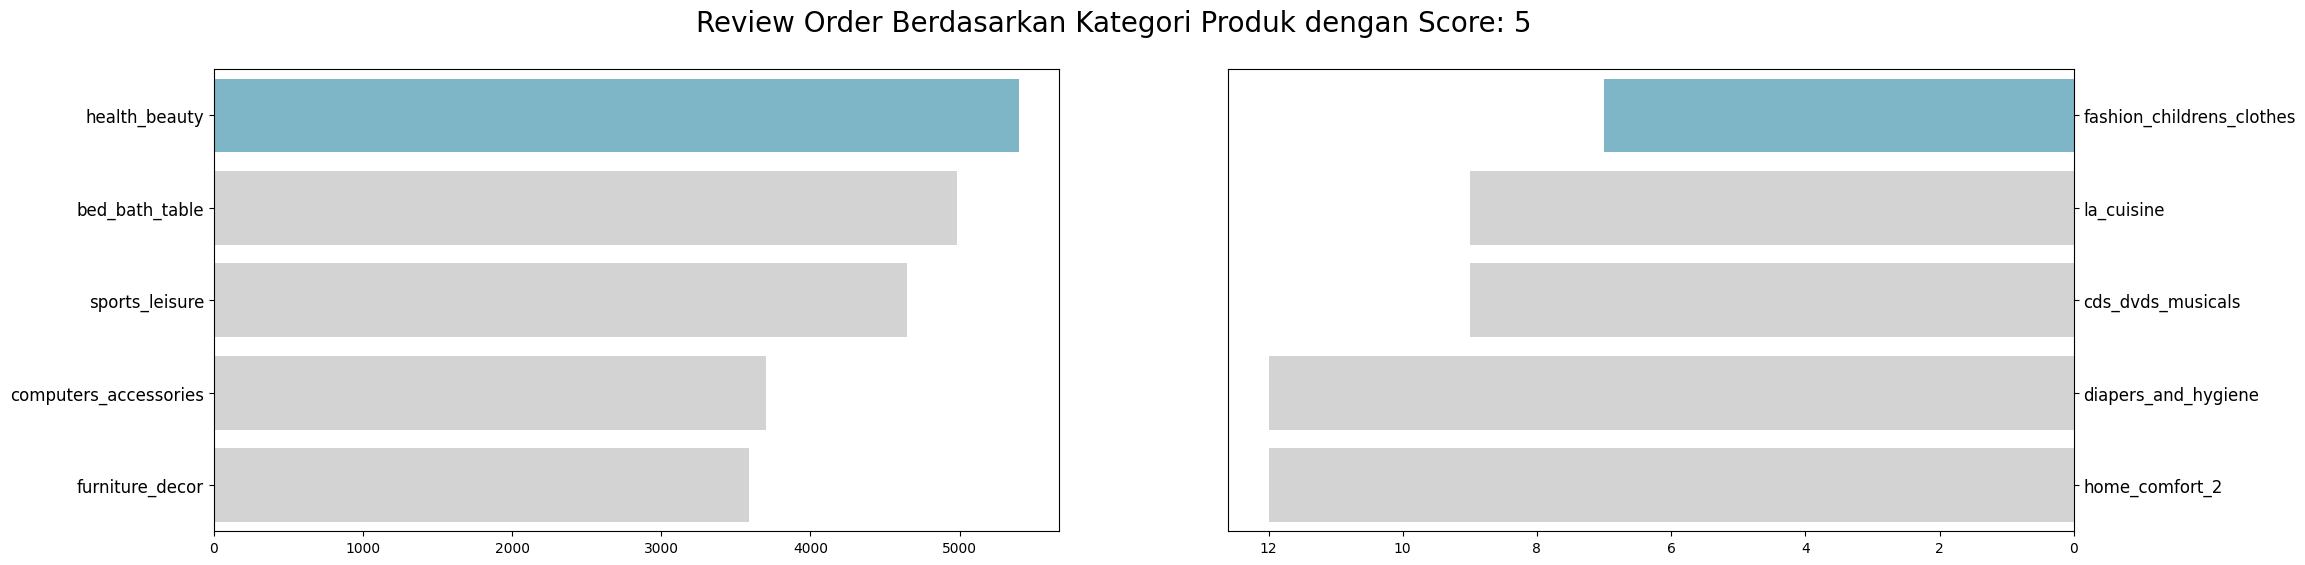

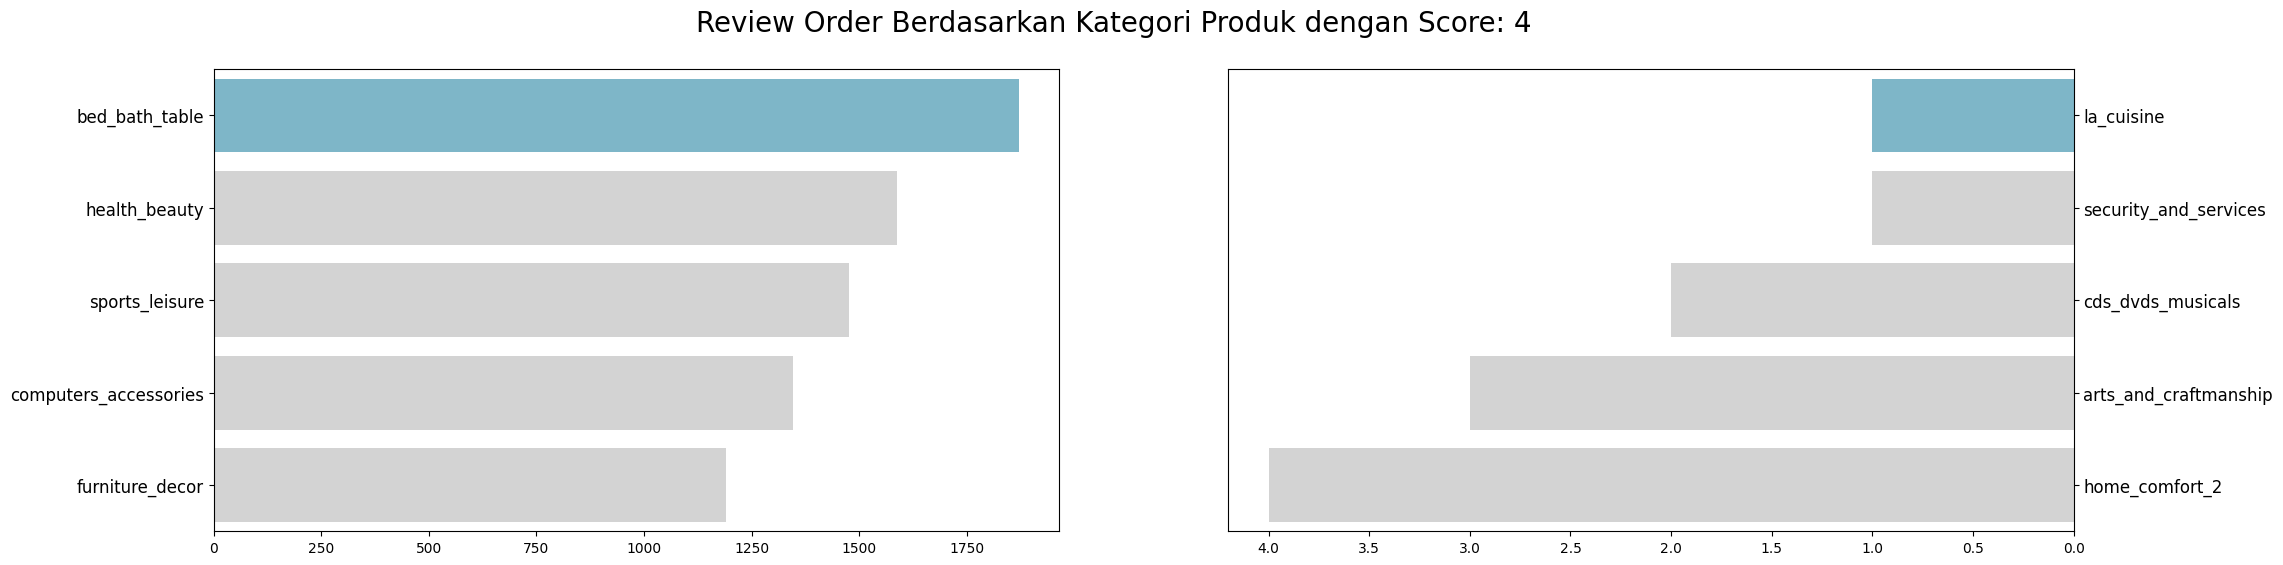

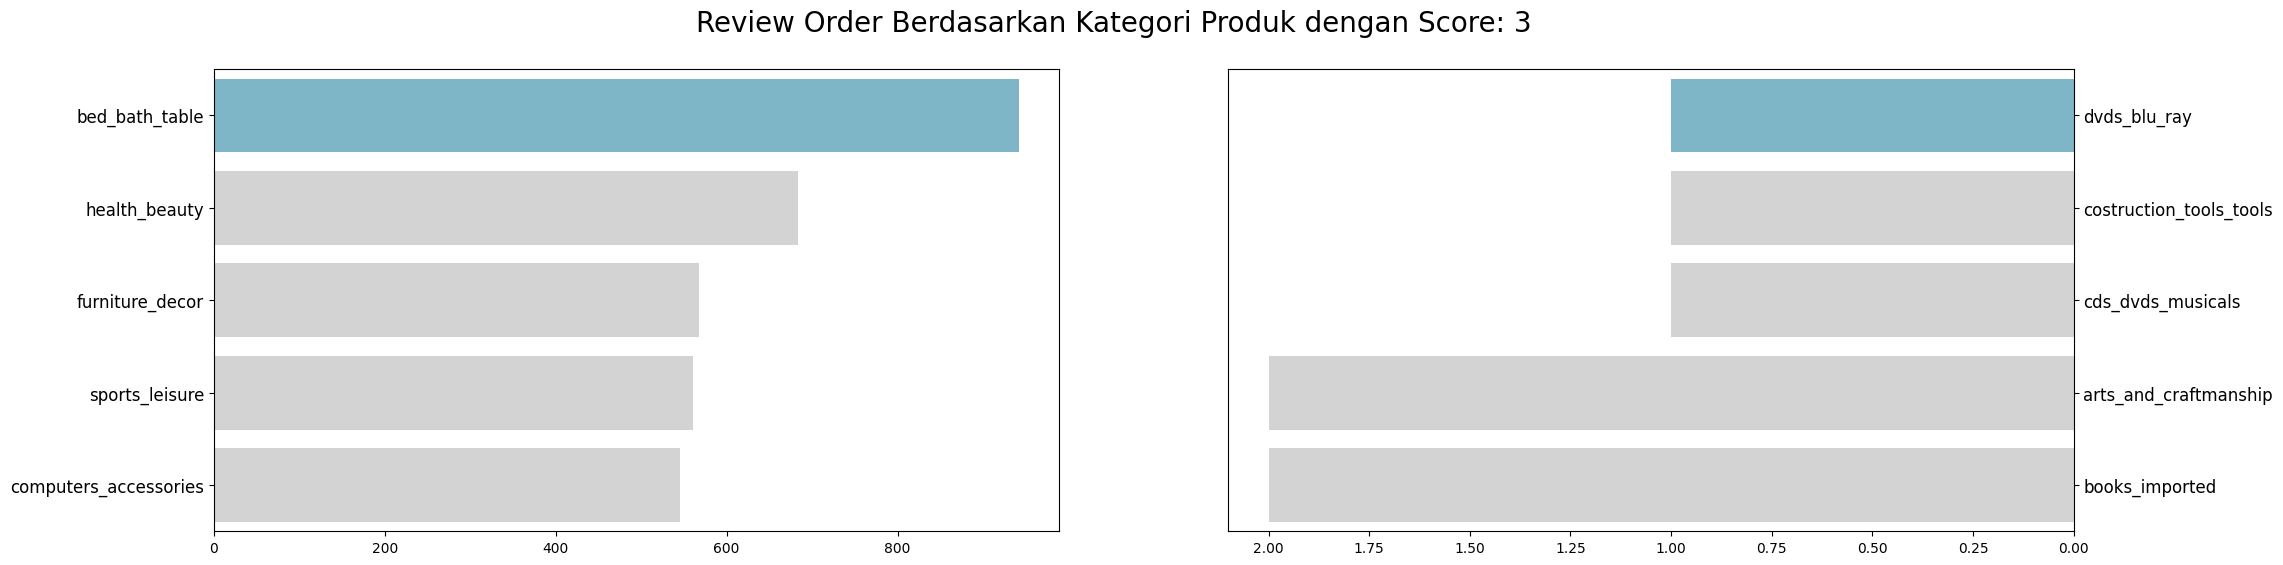

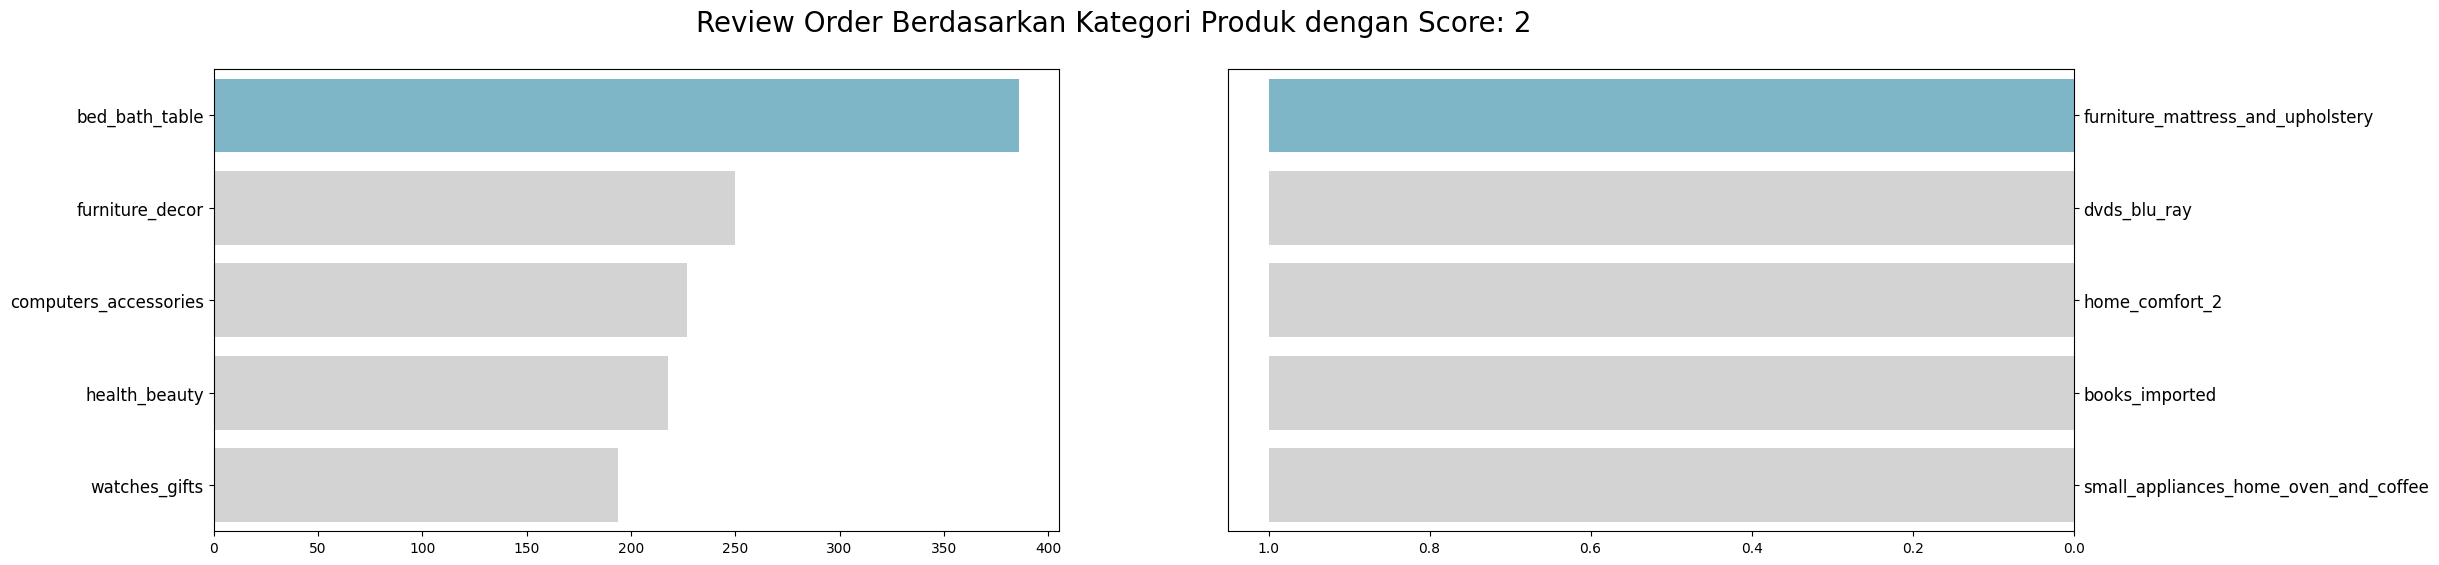

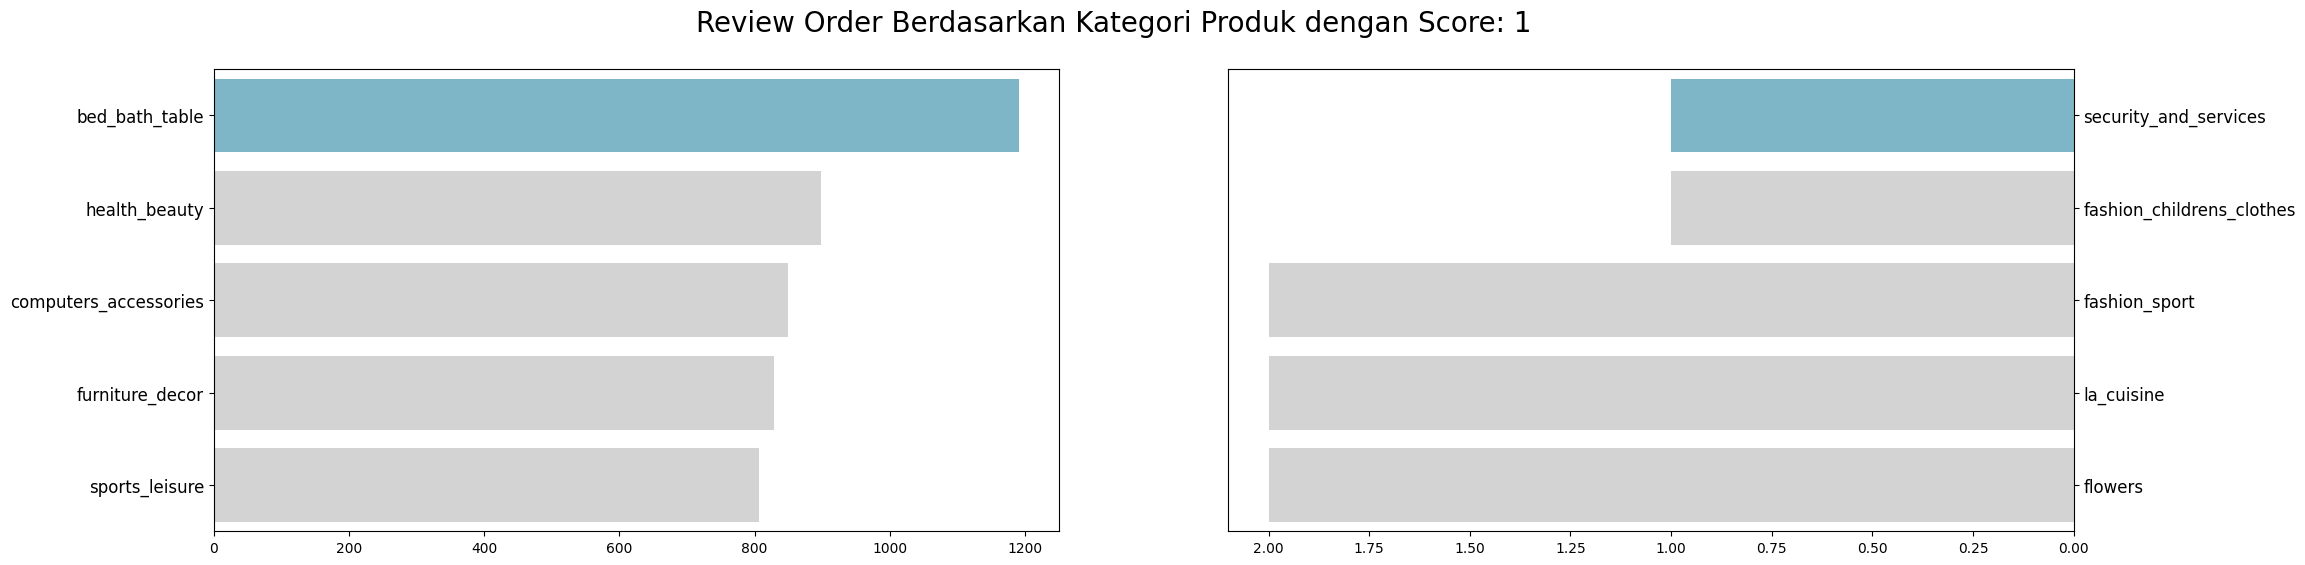

In [148]:
for score in list_review_score:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

    colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

    sns.barplot(x='order_id', y='product_category_name_english', data=reviews_by_product_category[reviews_by_product_category['review_score'] == score].head(5), palette=colors, ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel(None)
    #ax[0].set_title('Score Review Paling Tinggi', loc='center', fontsize=15)
    ax[0].tick_params(axis='y', labelsize=12)

    sns.barplot(x='order_id', y='product_category_name_english', data=reviews_by_product_category[reviews_by_product_category['review_score'] == score].sort_values(by='order_id', ascending=True).head(5), palette=colors, ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel(None)
    ax[1].invert_xaxis()
    ax[1].yaxis.set_label_position('right')
    ax[1].yaxis.tick_right()
    #ax[1].set_title('Score Review Paling Rendah', loc='center', fontsize=15)
    ax[1].tick_params(axis='y', labelsize=12)

    plt.suptitle('Review Order Berdasarkan Kategori Produk dengan Score: '+score, fontsize=20)
    plt.show()

## Conclusion

**Conclution pertanyaan 1**
- Terjadi peningkatan penjualan dari bulan 12 (2016) hingga bulan 11 (2017)
- Peningkatan jumlah penjualan terbesar terjadi dari bulan 10 (2017) hingga 11 (20017)

**Conclution pertanyaan 2**
- Produk paling banyak terjual yaitu bed bath table
- Produk paling sedikit terjual yaitu security and services

**Conclution pertanyaan 3**
- Pelanggan dominan berasal dari Kota Sao Paulo
- Negara dengan kode SP menjadi negara dengan jumlah pelanggan terbanyak

**Conclution pertanyaan 4**
- Jumlah pesanan terbanyak berasal dari Kota Sao Paulo dan negara dengan kode SP

**Conclution pertanyaan 5**
- Di Kota Sao Paulo, produk yang paling banyak dipesan yaitu bed bath table sedangkan produk yang paling sedikit dipesan yaitu la cuisine

**Conclution pertanyaan 6**
- Produk health beauty memperoleh paling banyak review dengan score 5.
- Produk dengan review score 1 paling banyak yaitu bed bath table. Namun, bed bath table juga berada di posisi kedua terbanyak mendapat review score 5.